# Mathematics and Multivariate Statistics - Portfolio Exam

### NAME : ASHRAF ALI KHAN PATAN
### SUBMITTED TO : Stephan Doerfel

<div class="alert alert-block alert-success">
<b> Task 1- Story 
 </b> 
</div>

### Data Set Info :
- The data set(Asteroids Classification)is taken from Kaggle which is based on Unsupervised Learning.
- This is the Kaggle link where i got my data set by Shruti mehta- https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification/data
- The actual data is collected from the (http://neo.jpl.nasa.gov/).

<div class="alert alert-block alert-info">
Asteroids are small, rocky bodies that orbit the sun which are primarily found in the asteroid belt between Mars and Jupiter.Some asteroids are classified as near-Earth asteroids(NEO'S) if their orbits bring them close to the Earth’s orbit.
As a data scientist at NASA I am responsible for analyzing the dataset of near Earth objects (NEOs) to improve our comprehension of these entities and strengthen our defense strategies for planets. This dataset contains details about NEOs, such as their features like absolute brightness estimated size orbital traits and other relevant parameters.

#### Experiment Strategy:
For this experiment my proposal is to use clustering analysis to group NEOs based on their orbital characteristics excluding the 'Hazardous column'. The main objective is to unveil patterns and cluster asteroids together to gain insights into their structure origin and orbital behavior.

#### Objective:
Detecting Asteroid Families; By clustering NEOs according to their orbital attributes we seek to identify groups or families of asteroids with similar traits. This approach will help us categorize asteroids based on their composition and source providing insights into the evolution of our solar system.

Exploring Patterns: Utilizing clustering analysis will allow us to delve into the patterns of various asteroid clusters, uncovering similarities and differences in their paths. Understanding these trends can offer information, about the gravitational influences and resonance effects that shape the NEO population.Optimizing resource allocation, for space missions involves grouping asteroids into clusters based on their characteristics. These clusters, with attributes like composition or proximity to Earth can be designated for focused exploration endeavors to maximize the scientific value gained.

The application of clustering analysis to the Near Earth Object (NEO) dataset promises advancements in our comprehension of asteroids and fortification of defense capabilities. By identifying patterns and organizing asteroids according to their physical and orbital traits we aim to;
1.Deepen our understanding of asteroid composition and origins contributing to the broader realm of planetary science.
2.Guide space missions by pinpointing priority targets within asteroid clusters.
3.Enhance our ability to foresee and mitigate asteroid threats towards Earth ensuring the protection of our planet against collisions.

In essence this clustering analysis plays a role, in our efforts to explore,comprehend and protect Earth from the changing domain of near Earth objects.

<div class="alert alert-block alert-success">
<b> Task 2- The Data
 </b> 
</div>

- Importing Packages

In [139]:
import numpy as np              # library for numerical calculations
import pandas as pd        # library for data manipulation like reading and writing data
from sklearn.cluster import KMeans, DBSCAN  # library for clustering kmeans and dbscan
import seaborn as sns       # library for data visualization
import matplotlib.pyplot as plt         # library for data visualization
from sklearn.preprocessing import StandardScaler    # library for scaling the data
from sklearn import metrics                     # library for evaluating the model
from sklearn.decomposition import PCA    # library for dimensionality reduction

- Importing data set 

In [140]:
idf=pd.read_csv("nasa.csv") #read the csv file

In [141]:
idf.head()#understanding the data- First 5 rows of the data set.

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   

   Hazardous  
0       True  
1      False  
2       True  
3      False  
4       True  

[5 rows x 40 columns]

In [142]:
#Last 5 rows of the data set.
idf.tail()

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
4682            0.098637          44.111820          98.637028   
4683            0.013616           6.089126          13.615700   
4684            0.171412          76.657557         171.411509   
4685            0.259442         116.025908         259.441818   
4686            0.895860         400.640618         895.859655   

      Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
4682               0.027410               0.061290            144.723824  ...   
4683               0.003784               0.008460             19.977449  ...   
4684               0.047633               0.106510            251.501180  ...   
4685               0.072095               0.161210            380.662441  ...   
4686               0.248946               0.556661           1314.437764  ...   

      Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
4682          164.183305     457.179984             0.741558      276.395697   
4683          345.225230     407.185767             0.996434       42.111064   
4684           37.026468     690.054279             0.965760      274.692712   
4685          163.802910     662.048343             1.185467      180.346090   
4686          187.642183     653.679098             0.876110      222.436688   

      Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
4682       1.581299     2.457708e+06    304.306025     0.787436    J2000   
4683       1.153835     2.458088e+06    282.978786     0.884117    J2000   
4684       2.090708     2.458300e+06    203.501147     0.521698    J2000   
4685       1.787733     2.458288e+06    203.524965     0.543767    J2000   
4686       2.071980     2.458319e+06    184.820424     0.550729    J2000   

      Hazardous  
4682      False  
4683      False  
4684      False  
4685      False  
4686      False  

[5 rows x 40 columns]

In [143]:
idf.columns #column names

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

- Explainig features from above

<div class="alert alert-block alert-info">
I have explained all the features of my data set below:
Orbital Parameters—Columns, e.g., Eccentricity, Semi Major Axis, Inclination, Asc Node Longitude, Orbital Period, Perihelion Distance, Aphelion Dist, Perihelion Arg: These provide much detail about the orbital dynamics of each NEO. Clustering on these parameters will help in picking out groups of asteroids that share similar orbits, possibly suggesting a common origin or similar evolutionary paths. Such a clustering structure could reveal asteroid families.

Absolute Magnitude and Estimated Size—Absolute magnitude (related to brightness) and estimated size parameters, such as Est Dia in KM, M, Miles, and Feet: Such parameters allow inferences to be drawn concerning the composition and structure of NEOs. Different materials will reflect sunlight differently, affecting brightness and apparent size estimates. Clustering NEOs on these characteristics can give inferences about material composition, probably linking it with some families or origins of specific asteroids.

Minimum Orbit Intersection and Jupiter Tisserand Invariant: These parameters are necessary for the understanding of how NEOs interact with other solar system bodies—first of all, how they are affected by Jupiter, which has quite strong forces. Grouping NEOs by these attributes can enable guessing the groups more prone to such gravitational interaction and hence drawing insight into dynamic processes forming NEO orbits.

Miss Distance (Astronomical, Lunar, Kilometers, Miles) These are metrics of NEOs showing how close they come to the earth and, therefore, a means of prioritizing NEOs for further study in the face of threat or accessibility for missions. Clustering NEOs using their approach distance to Earth could help in the identification of clusters more relevant for defense or exploration missions.

Uncertainty of Orbit and Date Determination: These two features represent the confidence in orbital data and the most recent update of it. Clustering along these features will identify NEOs for which the observation is more urgent to update and refine the prediction of their trajectory, an aspect of crucial importance to assess a threat and plan possible mitigation.

Epoch Osculation, Mean Anomaly and Mean Motion: These orbital elements give further details about the NEOs' position and movement in their orbits at a given time; they are, therefore, useful in the precise clustering and analysis of temporal patterns in NEO behavior. 

The dataset points, as provided in the richness of Task1 , are used to apply the clustering analysis in an effective way to the requirements of Task 1. This will further enhance the understanding of NEO characteristics, prediction, and mitigation of the potential threat and mission planning for improvement in knowledge and defense strategies against NEOs.

<div class="alert alert-block alert-success">
<b> Task 3- IDA(Initial Data Analysis)
 </b> 
</div>

- Shape and Type of data.

In [144]:
print(f'Dataset type: {type(idf)}')         #type of the dataset
print(f'Dataset shape: {idf.shape}')        #shape of the dataset

Dataset type: <class 'pandas.core.frame.DataFrame'>
Dataset shape: (4687, 40)


- From the above,i can tell that my data set is stored as data frame which is two dimensional.
- The data set contains 4687 rows and 40 columns.

- Describing the datat set 

In [145]:
idf.describe() #summary statistics

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       ...  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
count  ...      4687.000000  4687.000000         4687.000000     4687.000000   
mean   ...         1.400264    13.373844          172.157275      635.582076   
std    ...         0.524154    10.936227          103.276777      370.954727   
min    ...         0.615920     0.014513            0.001941      176.557161   
25%    ...         1.000635     4.962341           83.081208      365.605031   
50%    ...         1.240981    10.311836          172.625393      504.947292   
75%    ...         1.678364    19.511681          255.026909      794.195972   
max    ...         5.072008    75.406667          359.905890     4172.231343   

       Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
count          4687.000000     4687.000000    4687.000000     4.687000e+03   
mean              0.813383      183.932151       1.987144     2.457728e+06   
std               0.242059      103.513035       0.951519     9.442264e+02   
min               0.080744        0.006918       0.803765     2.450100e+06   
25%               0.630834       95.625916       1.266059     2.457815e+06   
50%               0.833153      189.761641       1.618195     2.457973e+06   
75%               0.997227      271.777557       2.451171     2.458108e+06   
max               1.299832      359.993098       8.983852     2.458839e+06   

       Mean Anomaly  Mean Motion  
count   4687.000000  4687.000000  
mean     181.167927     0.738242  
std      107.501623     0.342627  
min        0.003191     0.086285  
25%       87.006918     0.453289  
50%      185.718889     0.712946  
75%      276.531946     0.984669  
max      359.917991     2.039000  

[8 rows x 35 columns]

- The describe() method is used to perfom statistical calculations
    - For example : let's check the column (Est Dia in M(max))
    - count-It shows the non null values and my data set has 4687 non-null values
    - mean-It shows the average value of this column and it is 457.508906 meters
    - std- The values in a which differ from the average value and its 826.391249 meters
    - min-The minimum value present in this column is 2.259644 meters
    - max- The maximum value present in this column is 34836.938254 meters

In [146]:
idf.info()   #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

- This is the description of my nasa data set which has 4687 entries ranging from index 0 to 4686.
    - There are 40 columns in total  a mix of numerical and categorical information, with most columns being numerical (integers or floats) and a few being categorical (object or boolean): in which 30 columns has the 'float64 data type' , 5 columns has the integer data type .Additionally, the last column, Hazardous, is described as a boolean column indicating whether a particular object is hazardous or not.
    - However, there are no missing values in my data set as there are 4687 non null values.
    - My nasa data set has the information about near-Earth objects (NEOs) or asteroids, including various characteristics such as their size, shape , velocity, and it has used a memory of 1.4+ mega bytes.
    

### Distributions on relevant columns

- Distribution of Eccentricity

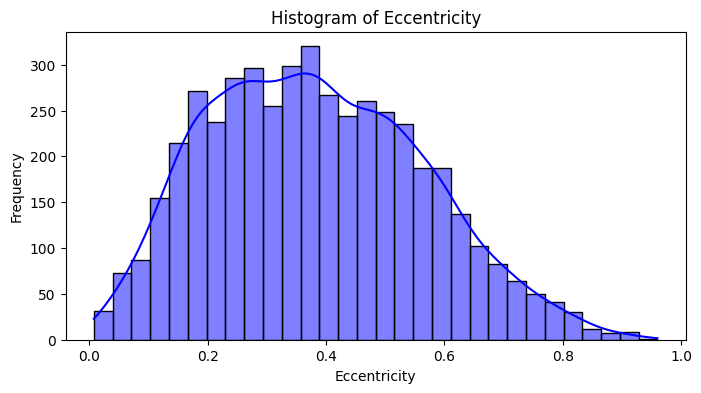

In [147]:
plt.figure(figsize=(8, 4))         #setting the figure size
sns.histplot(idf['Eccentricity'], kde=True, color="blue")   #plotting the histogram
plt.title('Histogram of Eccentricity')  #title of the plot
plt.xlabel('Eccentricity')      #x-axis label
plt.ylabel('Frequency')         #y-axis label
plt.show()              #display the plot

- So, as we can see from the above histogram the maximum number of asteroids has the eccentricity between 0.3 and 0.4.
    - Here,Eccentricity describes the shape of an asteroid.If eccentricity is 0 then the asteroid has the circular shape and if 1 then elliptical shape.
    - So,as the maximum number of asteroids lies between 0.3 and 0.4 we can tell that asteroids posses a random shape which is neither circular nor elliptical.

Distribution of Orbital Period

<Figure size 600x600 with 0 Axes>

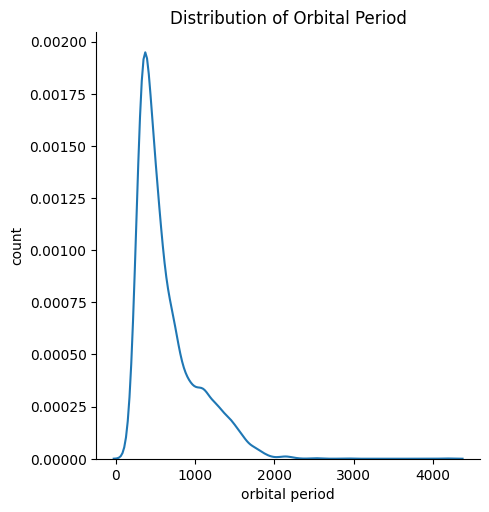

In [148]:
plt.figure(figsize=(6, 6))                          #To give a proper size to an image
sns.displot(kind='kde', data=idf['Orbital Period']) # here i have used a kde plot and 'kind' - type of plot i need
plt.xlabel('orbital period')                #I have named x-axis as 'orbital period' using xlabel
plt.ylabel('count')                                     #I have named y-axis as 'count' using ylabel
plt.title('Distribution of Orbital Period')             #plt.title is used to give a heading/title to my distribution
plt.show()                                        #plt.show() is used to display the result 

- The Displot represents the orbital period of asteroids.
    - The line in the graph represents KDE(Kernel Density Estimator)
    - x-axis denotes the orbital period and y-axis denotes count of asteroids that falls under each bin.
    - So,most of the asteroids takes 500days of time to revolve around the sun and only few asteroids takes time of 2000-2500 days to complete one revolution.

Distribution of Relative velocity per hour

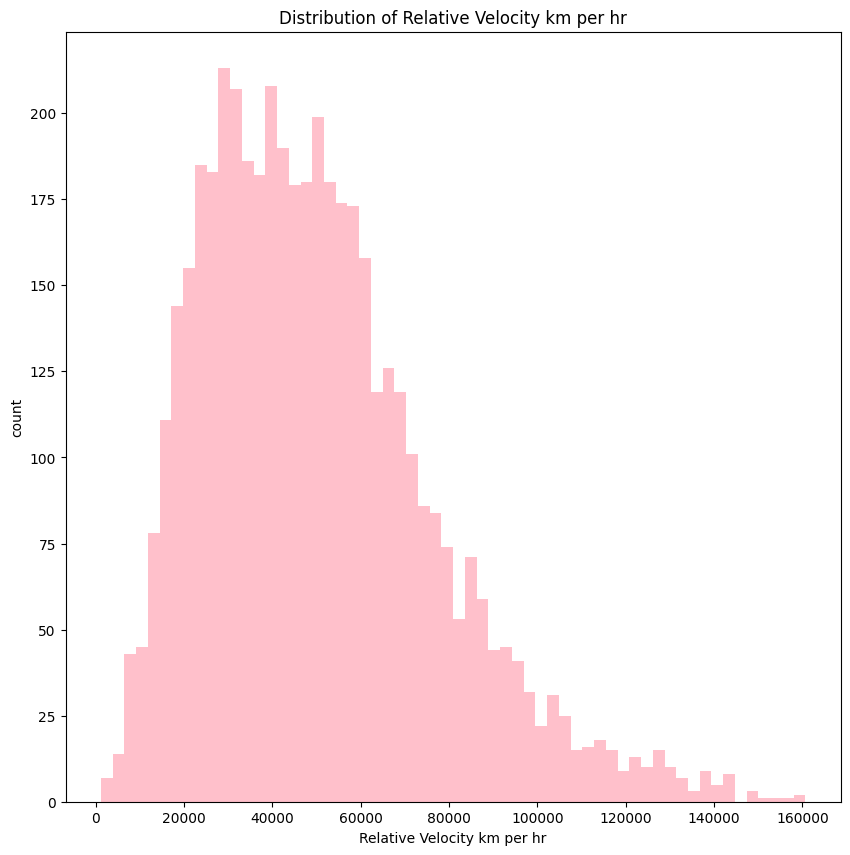

In [149]:
plt.figure(figsize=(10, 10))                  #To give a proper size to an image
plt.hist(idf['Relative Velocity km per hr'], bins=60, color='pink')     #histogram is used to plot the data
plt.xlabel('Relative Velocity km per hr')      #I have named x-axis as 'Relative Velocity km per hr' using xlabel
plt.ylabel('count')                 #I have named y-axis as 'count' using ylabel
plt.title('Distribution of Relative Velocity km per hr')       # heading/title to my distribution
plt.show()         #display the plot

- The above histogram represents the distribution of relative velocity of asteroids in km/hr.
    - The maximum number of asteroids travels with a speed of 20000-60000 km/hr.

Distribution of Absolute Magnitude

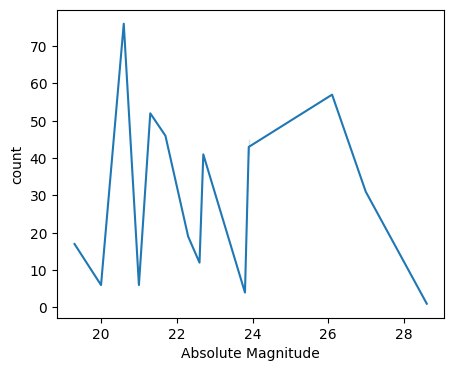

In [150]:
plt.figure(figsize= (5,4))      #setting the figure size
sns.lineplot(data= idf, x = idf['Absolute Magnitude'], y=idf['Absolute Magnitude'].value_counts())  #plotting the line plot
plt.show()      #display the plot

- The above line plot represents the distribution of absolute magnitude.
    - absolute magnitude is inversely proportional to the brightness of the celestial bodies(i.e asteroids)
        - the higher the absolute magnitude, the dimmer the object appears when viewed from a standard distance. Conversely, the lower the absolute magnitude, the brighter the object appears.
    - Only a few asteroids has the absolute magnitude less than 20 and which are brighter and easy to observe from a certain distance.

Distribution on Diameter

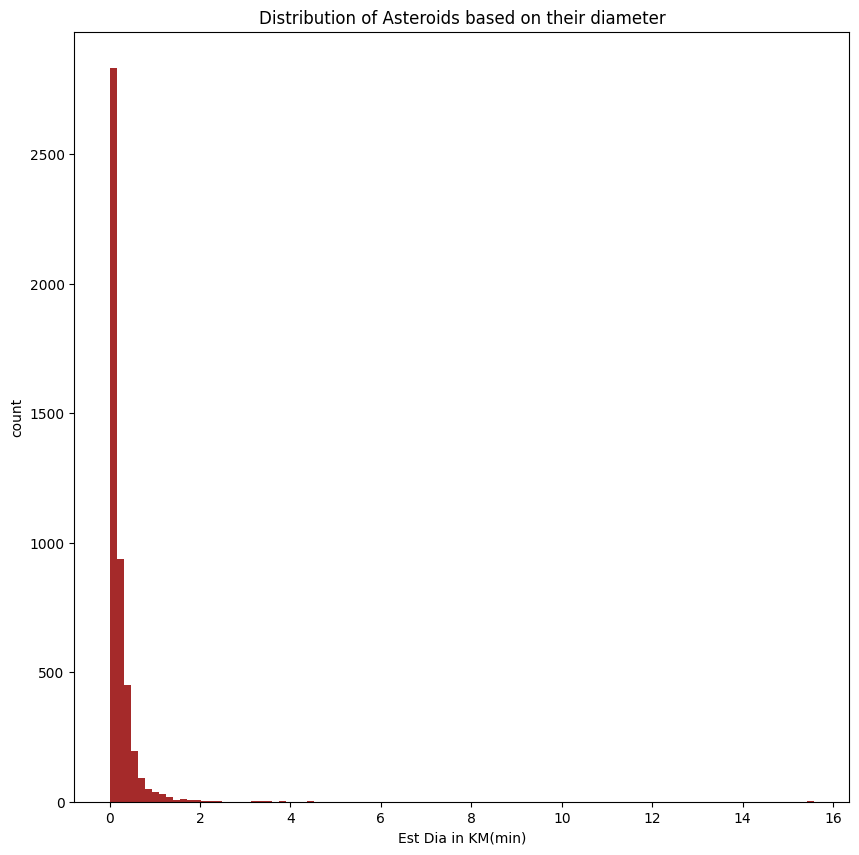

In [151]:
plt.figure(figsize=(10, 10))    #To give a proper size to an image
plt.hist(idf['Est Dia in KM(min)'], bins=100, color='brown')    #histogram is used to plot the data
plt.xlabel('Est Dia in KM(min)')        #I have named x-axis as 'Est Dia in KM(min)' using xlabel
plt.ylabel('count')         #I have named y-axis as 'count' using ylabel
plt.title('Distribution of Asteroids based on their diameter')  # heading/title to my distribution
plt.show()          #display the plot

- The histogram represents the Asteroids based on their diameter.
    - So most of the asteroids has the estimated minimum diameter of 0.001011-0.253837 km.


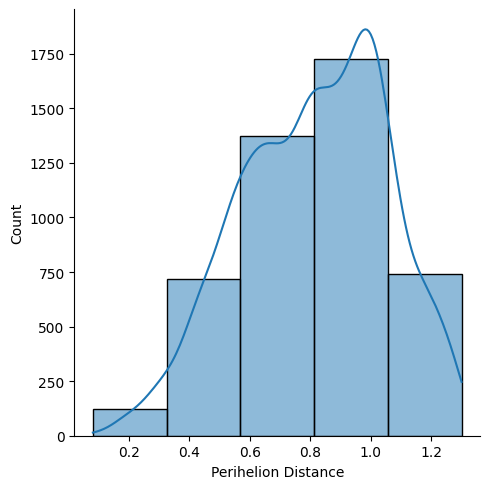

In [152]:
sns.displot(idf['Perihelion Distance'],bins=5,kde=True) #plotting the distribution plot

- The above histogram shows the distribution of perihelion distance and the line represents the kde(kernel density estimator)
    - so from the graph we can observe that maximum number of asteroids has a perihelion distance of 0.7 to 0.9 astronomical units(AU).It means it gets as close to the Sun as half the average distance between the Earth and the Sun.In other words the closest distance of an orbit from the sun.

<div class="alert alert-block alert-success">
<b> Task 4 – Pitch Meeting (was done in class)
 </b> 
</div>

<div class="alert alert-block alert-success">
<b> Task 5 – EDA(Exploratory Data Analysis) and Preprocessing
 </b> 
</div>

- Exploratory Data Analysis is a data exploaration technique to understand the various aspects of the data.
- Aim : Understanding and exploring the data , make sure the data is clean ,do not have any missing values or even null values in the data set, knowing the important variables in the data set and removing null values that may actually hinder the accuracy of conclusions when we work on model building.
- EDA helps us to identify the faulty points in the data
- EDA helps us to understand the relationship between the variables which gives us the wider perspective on the data.
- It includes several techniques in a sequence that we have to follow.
- steps :
1. Data cleaning - to get rid of the redundencies variables which means removing unwanted columns because it may overfit or underfit the model 
2. Analysis of relationship between the variables.

### Visualizing few more plots for better analysis

- creating a copy of the original data set for the visualization purpose so that it doesn't modify my original data set if we make any changes at the 
    time of plotting graphs.

In [153]:
idf1 = idf.copy() #copying the data set

In [154]:
idf1 #display the data set copy

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3703080  3703080              21.600            0.127220   
1              3723955  3723955              21.300            0.146068   
2              2446862  2446862              20.300            0.231502   
3              3092506  3092506              27.400            0.008801   
4              3514799  3514799              21.600            0.127220   
...                ...      ...                 ...                 ...   
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0               0.284472         127.219879         284.472297   
1               0.326618         146.067964         326.617897   
2               0.517654         231.502122         517.654482   
3               0.019681           8.801465          19.680675   
4               0.284472         127.219879         284.472297   
...                  ...                ...                ...   
4682            0.098637          44.111820          98.637028   
4683            0.013616           6.089126          13.615700   
4684            0.171412          76.657557         171.411509   
4685            0.259442         116.025908         259.441818   
4686            0.895860         400.640618         895.859655   

      Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0                  0.079051               0.176763            417.388066  ...   
1                  0.090762               0.202951            479.225620  ...   
2                  0.143849               0.321655            759.521423  ...   
3                  0.005469               0.012229             28.876199  ...   
4                  0.079051               0.176763            417.388066  ...   
...                     ...                    ...                   ...  ...   
4682               0.027410               0.061290            144.723824  ...   
4683               0.003784               0.008460             19.977449  ...   
4684               0.047633               0.106510            251.501180  ...   
4685               0.072095               0.161210            380.662441  ...   
4686               0.248946               0.556661           1314.437764  ...   

      Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0             314.373913     609.599786             0.808259       57.257470   
1             136.717242     425.869294             0.718200      313.091975   
2             259.475979     643.580228             0.950791      248.415038   
3              57.173266     514.082140             0.983902       18.707701   
4              84.629307     495.597821             0.967687      158.263596   
...                  ...            ...                  ...             ...   
4682          164.183305     457.179984             0.741558      276.395697   
4683          345.225230     407.185767             0.996434       42.111064   
4684           37.026468     690.054279             0.965760      274.692712   
4685          163.802910     662.048343             1.185467      180.346090   
4686          187.642183     653.679098             0.876110      222.436688   

      Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0          2.005764     2.458162e+06    264.837533     0.590551    J2000   
1          1.497352     2.457795e+06    173.741112     0.845330    J2000   
2          1.966857     2.458120e+06    292.893654     0.559371    J2000   
3          1.527904     2.457902e+06     68.741007     0.700277    J2000  

In [155]:
np.random.seed(0) #setting the seed value   
data = {
    'Est Dia in KM(min)': np.random.uniform(0.1, 1.0, 100),
    'Est Dia in KM(max)': np.random.uniform(0.2, 1.2, 100),
    'Epoch Date Close Approach': pd.date_range(start='2021-01-01', periods=100, freq='M'),
    'Relative Velocity km per sec': np.random.uniform(5, 25, 100),
    'Miss Dist.(Astronomical)': np.random.uniform(0.05, 0.5, 100),
    'Orbit Uncertainity': np.random.choice([0, 1, 2, 3, 4, 5], 100),
    'Eccentricity': np.random.uniform(0, 1, 100),
    'Semi Major Axis': np.random.uniform(0.5, 5.0, 100)
}                           #creating a dictionary

/var/folders/8p/rzx2wz192vs_4smnxqr6wc4m0000gn/T/ipykernel_3079/894900179.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Epoch Date Close Approach': pd.date_range(start='2021-01-01', periods=100, freq='M'),


- Histogram plot of Estimated Diameters based on max and min values.

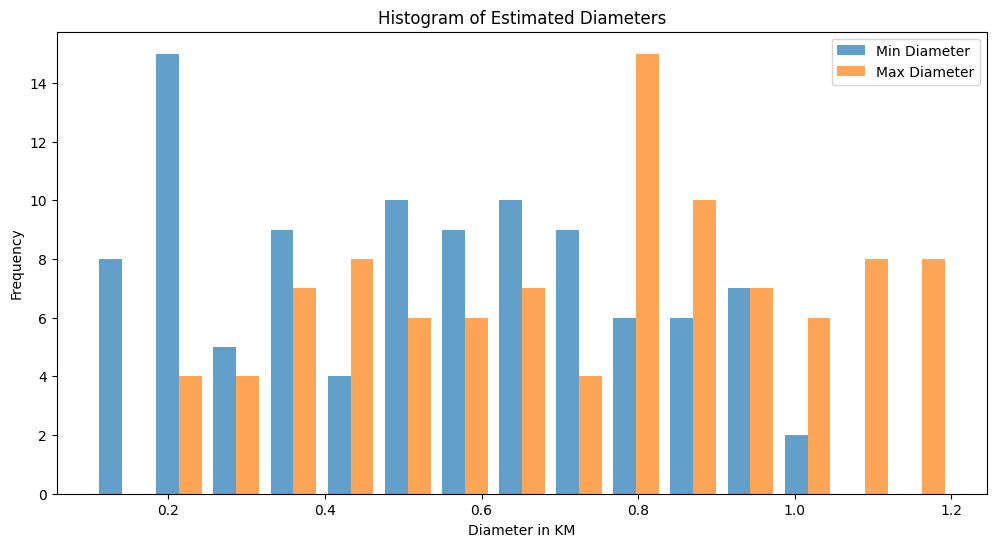

In [156]:
idf1 = pd.DataFrame(data) #creating a data frame from the data dictionary
plt.figure(figsize=(12, 6))     #setting the figure size
plt.hist([idf1['Est Dia in KM(min)'], idf1['Est Dia in KM(max)']], bins=15, alpha=0.7, label=['Min Diameter', 'Max Diameter']) #plotting the histogram
plt.xlabel('Diameter in KM')    #x-axis label
plt.ylabel('Frequency')         #y-axis label
plt.title('Histogram of Estimated Diameters')   #title of the plot
plt.legend()                #legend of the plot showing the labels
plt.show()           #display the plot



- The above histogram shows the frequency distribution of the estimated minimum and maximum diameters of asteroids. It helps us understand the range and most common sizes of these asteroids, maximum estimates generally tend to be larger, as expected.

- Scatter plot of Orbit Eccentricity and Semi major axis

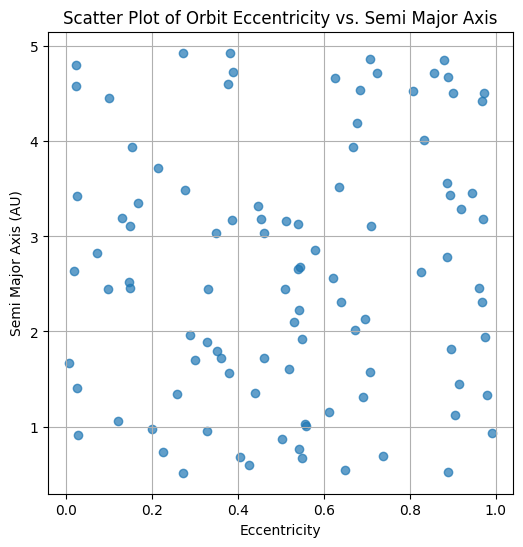

In [157]:
plt.figure(figsize=(6, 6))  #setting the figure size
plt.scatter(idf1['Eccentricity'], idf1['Semi Major Axis'], alpha=0.7) #plotting the scatter plot
plt.xlabel('Eccentricity')                                              #x-axis label
plt.ylabel('Semi Major Axis (AU)')                                          #y-axis label
plt.title('Scatter Plot of Orbit Eccentricity vs. Semi Major Axis')         #title of the plot
plt.grid(True)                                   #grid lines                
plt.show()                                  #display the plot

- The above scatter plot illustrates the relationship between the eccentricity of orbits and their semi-major axes. No clear trend suggests that orbit size and shape are varied and independent in this sample.



- Time series plot

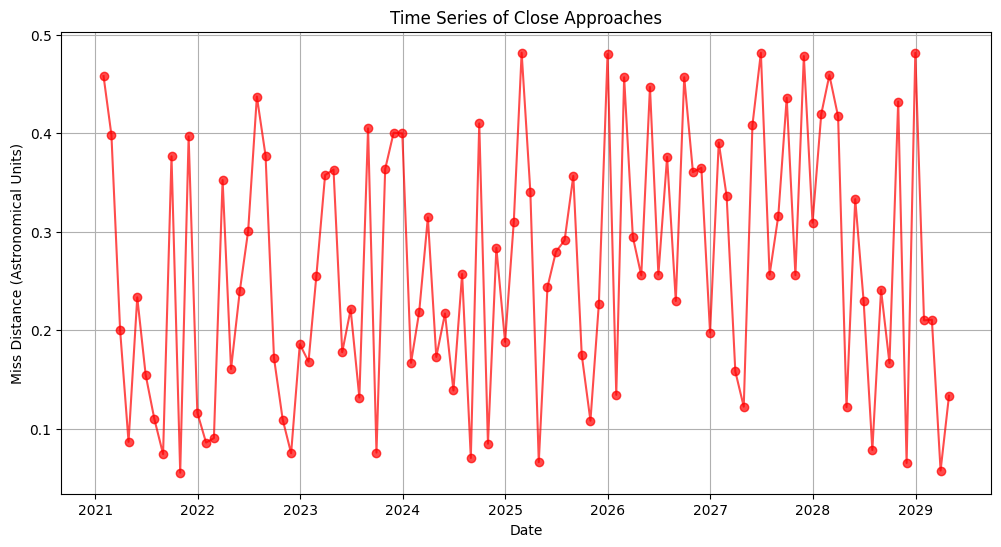

In [158]:
plt.figure(figsize=(12, 6))  # setting the figure size
plt.plot(idf1['Epoch Date Close Approach'], idf1['Miss Dist.(Astronomical)'], marker='o', linestyle='-', alpha=0.7, color='red')  #plotting the line plot using color red
plt.xlabel('Date')              #x-axis label
plt.ylabel('Miss Distance (Astronomical Units)')        #y-axis label
plt.title('Time Series of Close Approaches')        #title of the plot  
plt.grid(True)      #grid lines
plt.show()         #display the plot    



- This time series plot tracks the distance at which objects pass by Earth over time.
- The time series graph provided visualizes the "Miss Distance (Astronomical Units)" of celestial objects as they approach Earth, with data plotted monthly from  2021 to 2028. 
- The x-axis represents time, and the y-axis indicates the distance in Astronomical Units (AU), where one AU is about 149.6 million kilometers.  It shows variations in how close these objects come, with some periods appearing to have closer approaches than others.

- Bar plot on Orbit Uncertainity

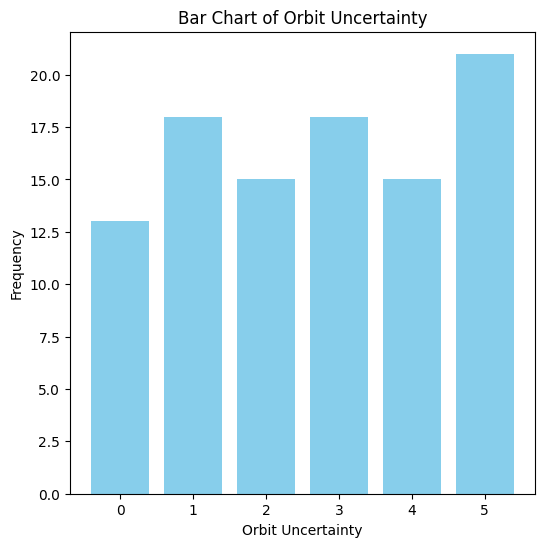

In [159]:
plt.figure(figsize=(6, 6))  #setting the figure size
plt.bar(idf1['Orbit Uncertainity'].value_counts().index, idf1['Orbit Uncertainity'].value_counts(), color='skyblue')  #plotting the bar chart
plt.xlabel('Orbit Uncertainty')   #x-axis label
plt.ylabel('Frequency')      #y-axis label
plt.title('Bar Chart of Orbit Uncertainty') #title of the plot
plt.xticks(range(6))  #setting the x-axis ticks range
plt.show()          #display the plot

- In the bar chart above, the distribution of orbit uncertainty values has been plotted as to how many objects have each amount of orbital path certainty; a high number would mean a low level of precision for the orbit.

- Violin plot on Miss Distance.

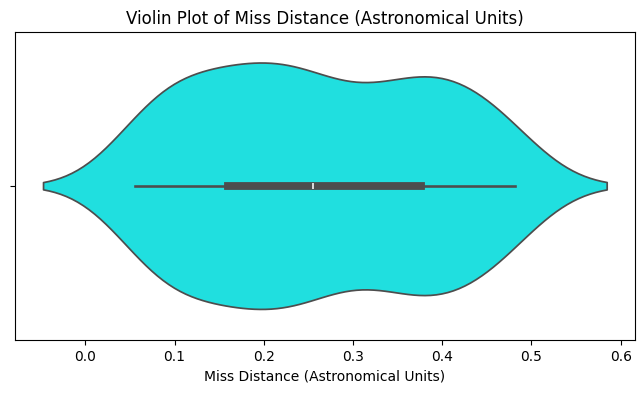

In [160]:
plt.figure(figsize=(8, 4))      #setting the figure size
sns.violinplot(x=idf1['Miss Dist.(Astronomical)'], color="cyan")     #plotting the violin plot using coloumn 'Miss Dist.(Astronomical)'
plt.title('Violin Plot of Miss Distance (Astronomical Units)')   #title of the plot
plt.xlabel('Miss Distance (Astronomical Units)')        #x-axis label
plt.show()        #display the plot

- The violin plot above visualizes the 'Miss Dist.(Astronomical)' data, showing the distribution and density of how close various celestial objects come to Earth, measured in Astronomical Units (AU).
- This plot is useful for understanding the variability and typical values of how close objects come to Earth.The distribution shows the range and concentration of miss distances, helping researchers and planners in their assessments and strategies.

- Scatter plot for relative velocity and miss distance.

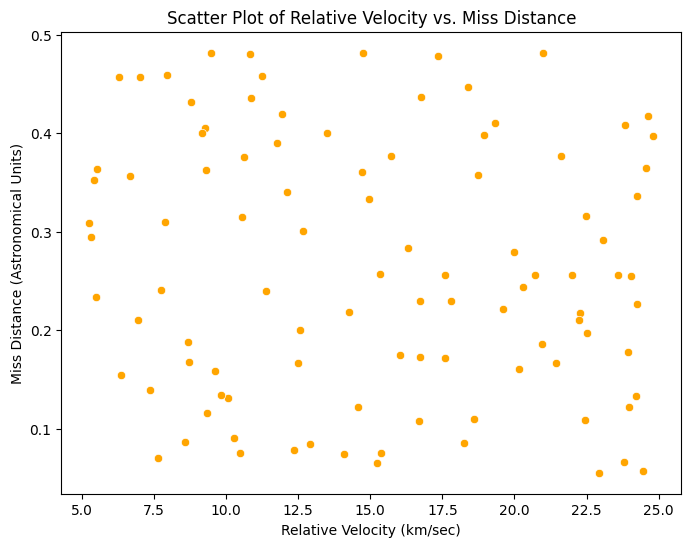

In [161]:
plt.figure(figsize=(8, 6))          #setting the figure size
sns.scatterplot(x='Relative Velocity km per sec', y='Miss Dist.(Astronomical)', data=idf1, color='orange')   #plotting the scatter plot
plt.title('Scatter Plot of Relative Velocity vs. Miss Distance')        #title of the plot
plt.xlabel('Relative Velocity (km/sec)')        #x-axis label
plt.ylabel('Miss Distance (Astronomical Units)')        #y-axis label
plt.show()      #display the plot

- This plot shows the relationship between the relative velocity of celestial objects as they approach Earth and their miss distance in astronomical units. The visualization can help identify if faster-moving objects tend to pass closer or further from Earth, which is useful for understanding the dynamics of these objects relative to Earth.

- Density Plot

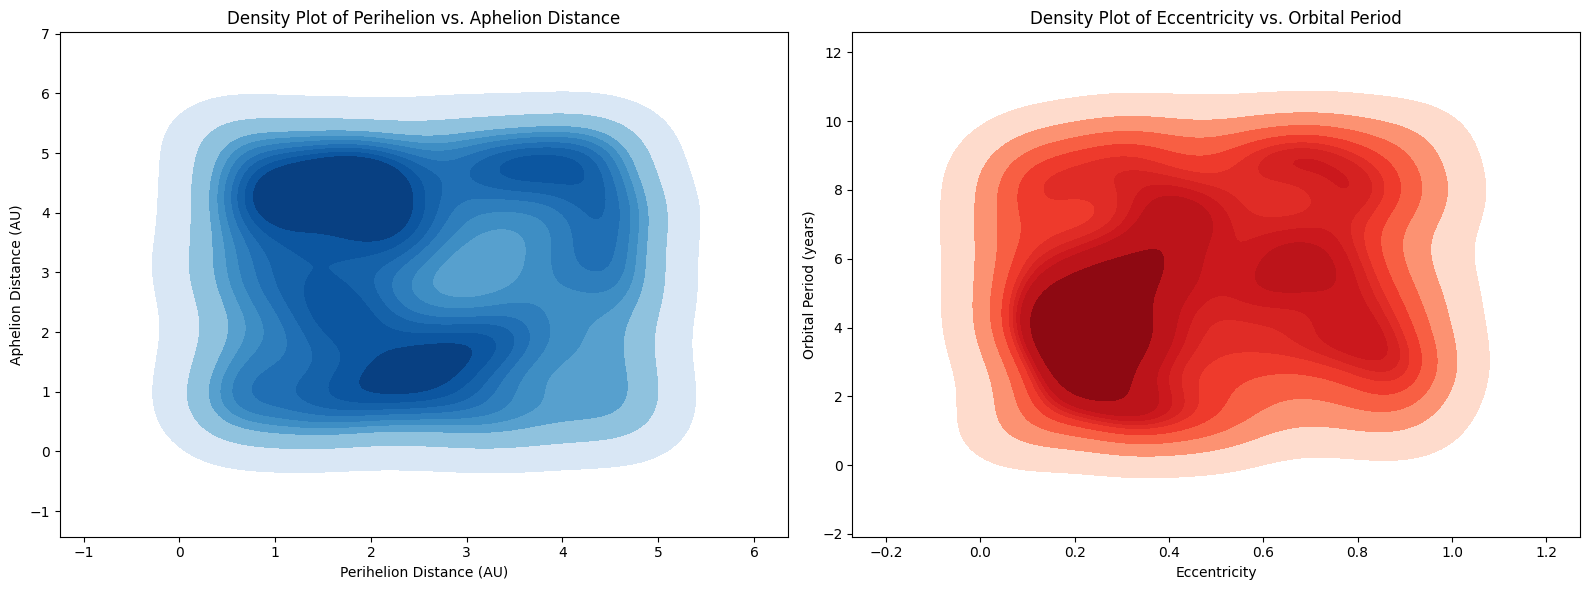

In [162]:
np.random.seed(0)           #setting the seed value
df = pd.DataFrame({
    'Perihelion Distance (AU)': np.random.uniform(0.1, 5.0, 1000),
    'Aphelion Distance (AU)': np.random.uniform(0.1, 5.5, 1000),
    'Orbital Period (years)': np.random.uniform(0.5, 10, 1000),
    'Eccentricity': np.random.uniform(0, 1, 1000)
})                                                                            #creating a data frame          
plt.figure(figsize=(16, 6))                                                 #setting the figure size
plt.subplot(1, 2, 1)                                                        #setting the subplot              
sns.kdeplot(x='Perihelion Distance (AU)', y='Aphelion Distance (AU)', data=df, fill=True, cmap="Blues") #plotting the density plot
plt.title('Density Plot of Perihelion vs. Aphelion Distance')       #title of the plot
plt.xlabel('Perihelion Distance (AU)')                           #x-axis label
plt.ylabel('Aphelion Distance (AU)')                     #y-axis label

plt.subplot(1, 2, 2)                                #setting the subplot
sns.kdeplot(x='Eccentricity', y='Orbital Period (years)', data=df, fill=True, cmap="Reds")  #plotting the density plot
plt.title('Density Plot of Eccentricity vs. Orbital Period')        #title of the plot
plt.xlabel('Eccentricity')                        #x-axis label
plt.ylabel('Orbital Period (years)')                #y-axis label

plt.tight_layout()          #tight layout so that the plots do not overlap
plt.show()                      #display the plot

- The  above density plot of the perihelion vs. aphelion distance provides the density distribution of the orbital points closest and farthest from the Sun, therefore representing how elliptic the orbit is. A concentration toward the line y = x will mean more circular orbits, while wider spreads point to more elliptic orbits. 
- The density plot of eccentricity vs. orbital period shows how the shape of the orbit is correlated with the period. for example, the orbits with higher eccentricities have longer or shorter periods. Then, the spread and concentration in this plot might help in finding common orbital configurations and outlining outliers that need further research. These plots, taken together, indicate how different orbital elements interact to bring forth the relationships important for the dynamical settings of the orbiting bodies.



- Bar Plot

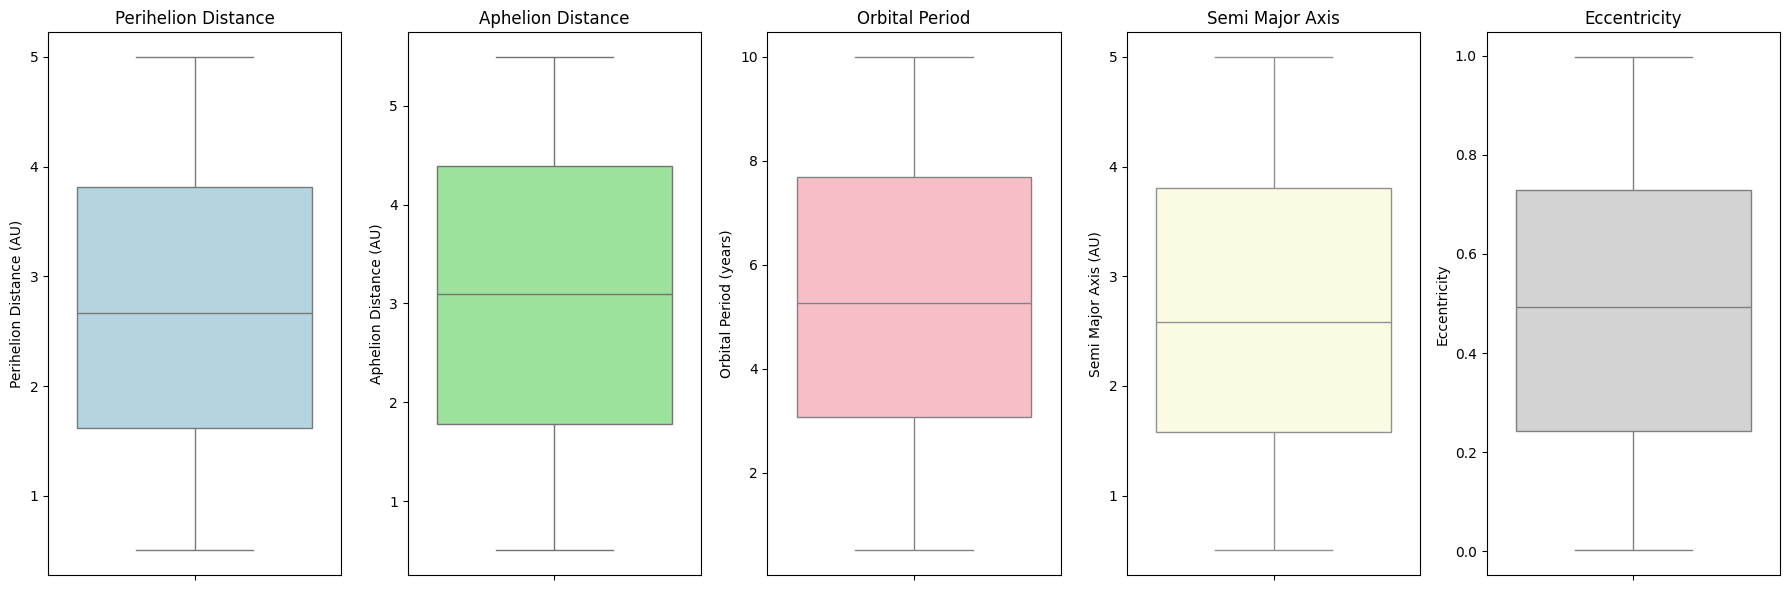

In [163]:
np.random.seed(0)  #setting the seed value  
data = {
    'Perihelion Distance (AU)': np.random.uniform(0.5, 5.0, 1000),  # AU = Astronomical Units
    'Aphelion Distance (AU)': np.random.uniform(0.5, 5.5, 1000),
    'Orbital Period (years)': np.random.uniform(0.5, 10, 1000),
    'Semi Major Axis (AU)': np.random.uniform(0.5, 5.0, 1000),
    'Eccentricity': np.random.uniform(0, 1, 1000)
}                                      #creating a dictionary
idf1 = pd.DataFrame(data)            #creating a data frame from the data dictionary

# Create box plots with outliers
plt.figure(figsize=(18, 6))         #setting the figure size

plt.subplot(1, 5, 1)                    #setting the subplot
sns.boxplot(y=idf1['Perihelion Distance (AU)'], color="lightblue", showfliers=True, flierprops={'marker':'o', 'color':'red'})        #plotting the box plot
plt.title('Perihelion Distance')        #title of the plot

plt.subplot(1, 5, 2)            #setting the subplot
sns.boxplot(y=idf1['Aphelion Distance (AU)'], color="lightgreen", showfliers=True, flierprops={'marker':'o', 'color':'red'})         #plotting the box plot
plt.title('Aphelion Distance')              #title of the plot

plt.subplot(1, 5, 3)                        #setting the subplot
sns.boxplot(y=idf1['Orbital Period (years)'], color="lightpink", showfliers=True, flierprops={'marker':'o', 'color':'red'})      #plotting the box plot
plt.title('Orbital Period')                 #title of the plot

plt.subplot(1, 5, 4)            #setting the subplot
sns.boxplot(y=idf1['Semi Major Axis (AU)'], color="lightyellow", showfliers=True, flierprops={'marker':'o', 'color':'red'})      #plotting the box plot
plt.title('Semi Major Axis')        #title of the plot

plt.subplot(1, 5, 5)        #setting the subplot
sns.boxplot(y=idf1['Eccentricity'], color="lightgray", showfliers=True, flierprops={'marker':'o', 'color':'red'})        #plotting the box plot  
plt.title('Eccentricity')       #title of the plot

plt.tight_layout()      #tight layout so that the plots do not overlap
plt.show()        #display the plot

- The above generates a series of five box plots, each representing different orbital characteristics of celestial objects. These plots are visualized side by side for easy comparison. 
- There are no outliers in the data set as all the points lie well within the range in the box plot.

### Checking Null Values

In [164]:
idf.isnull().sum() #checking for missing values

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

- Inside this data set we have zero null values so we dont have to worry about replacing any values.So,by this i can tell that my data set is clean.

### Dropping irrelevant columns

In [165]:
idf.columns #column names

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [166]:
df=idf.drop(columns=['Equinox','Hazardous','Orbiting Body','Orbit Determination Date','Close Approach Date']) #dropping the columns

- I have dropped few columns which are not required for my project which are as follows :
   - Equinox and Orbiting body has no unique values so these columns can be dropped.
   - Removing Hazardous columns as it is not required for my project.
   - Dropping the columns which are having dates as they dont help with the clustering of the project

In [167]:
df.info(),df.shape  #information about the data set and shape of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Epoch Date Close Approach     4687 non-null   int64  
 12  Relative Velocity km per sec  4687 non-null   float64
 13  Rel

(None, (4687, 35))

- Heat Map

<Axes: >

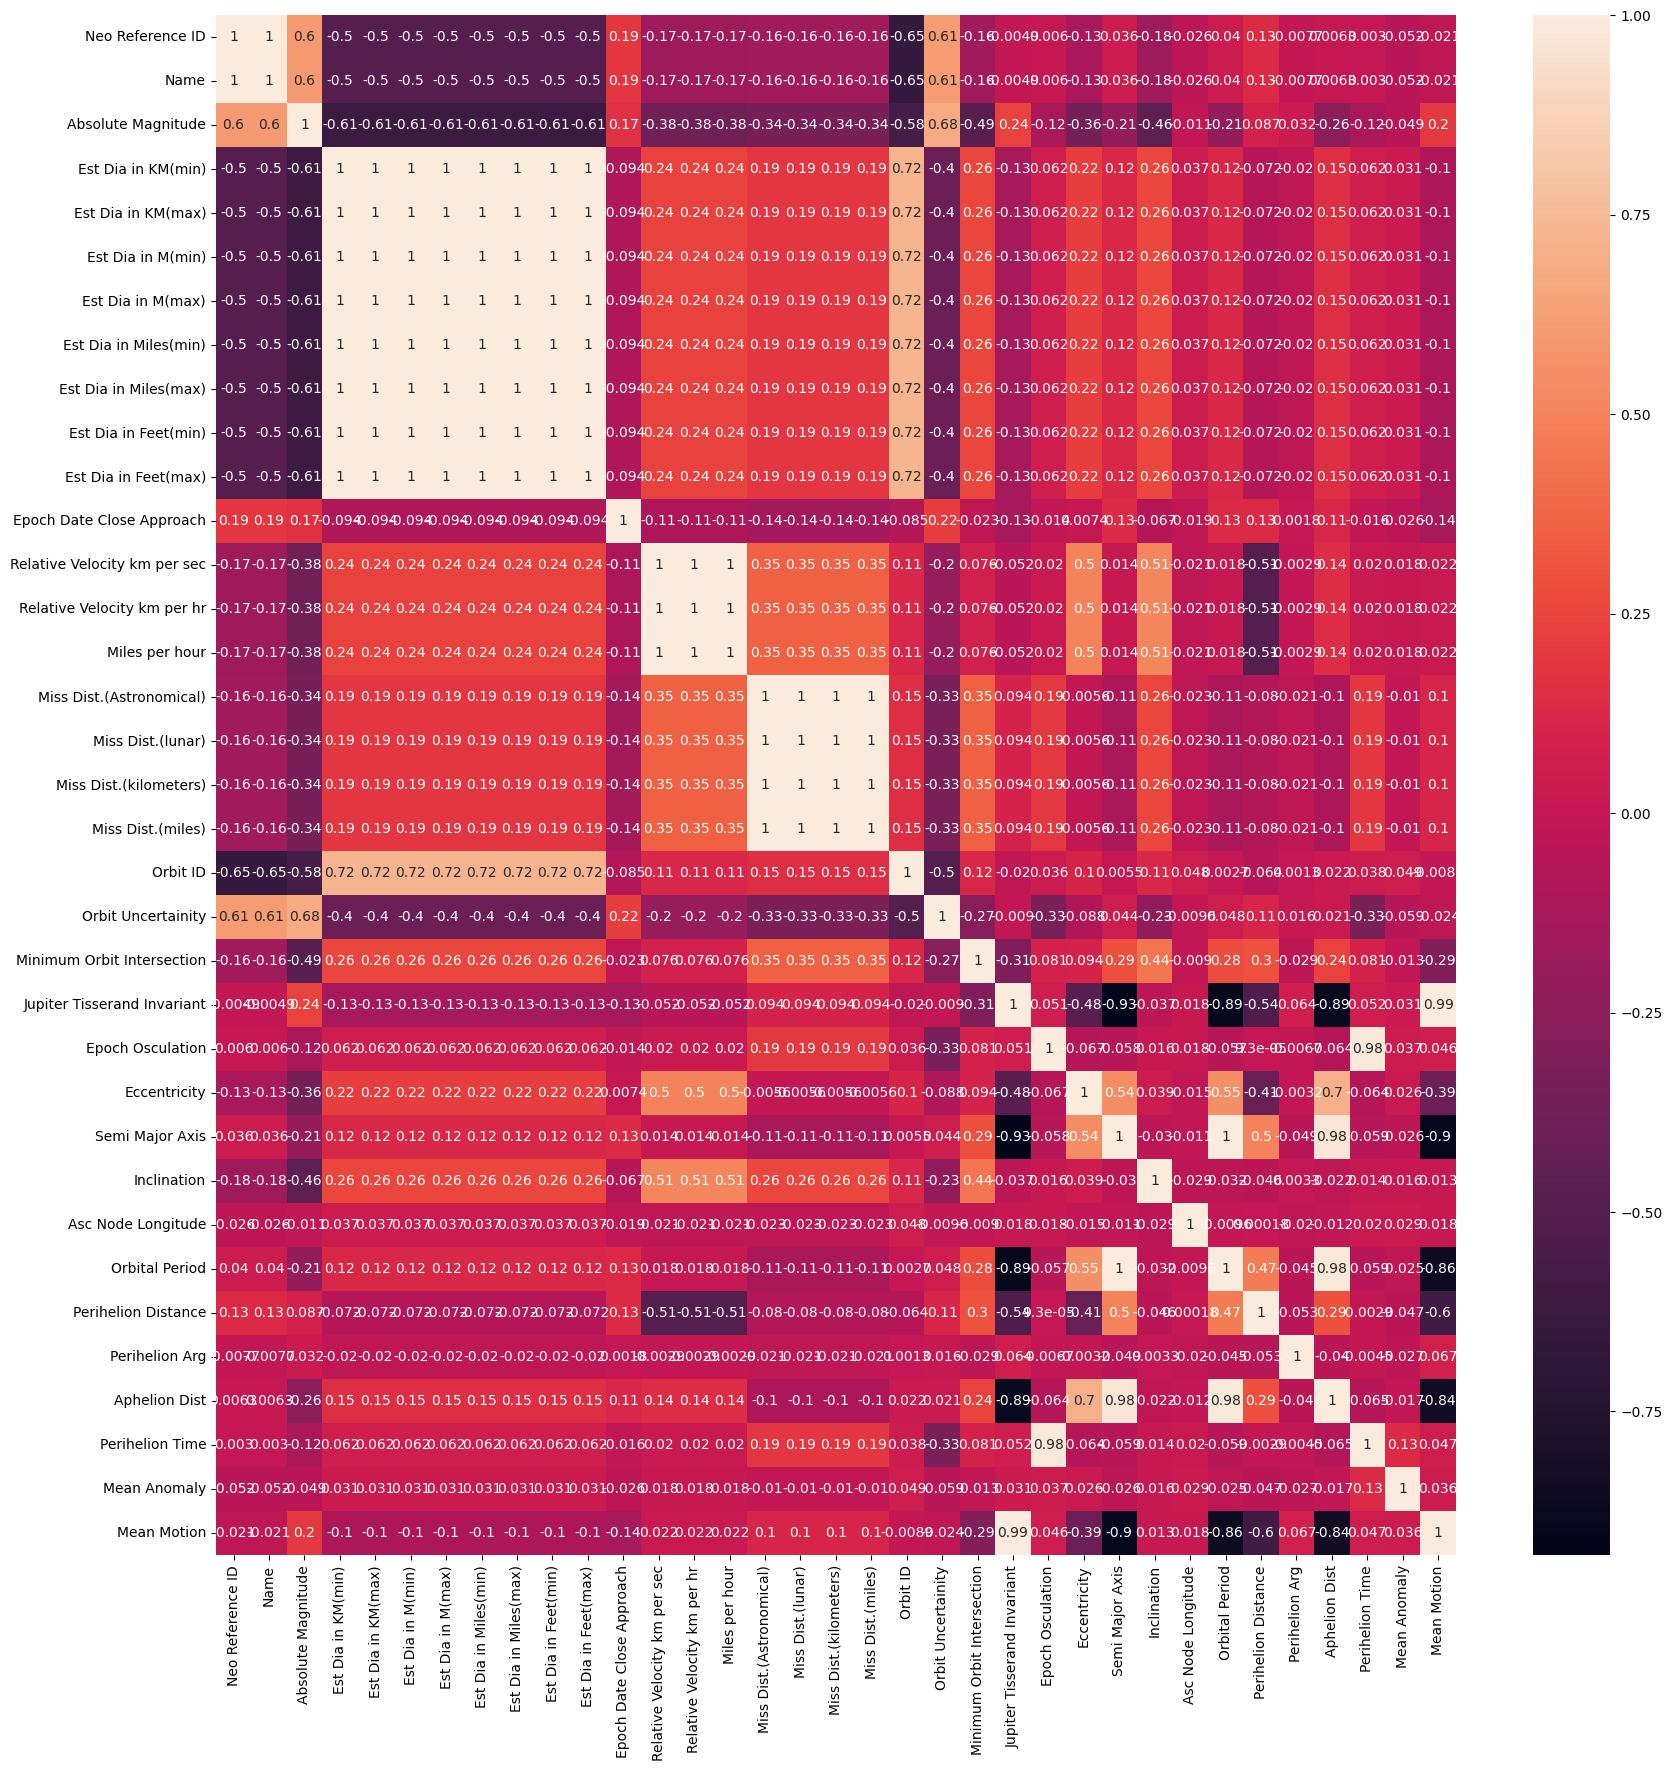

In [168]:
plt.figure(figsize=(20,20))     #setting the figure size
sns.heatmap(df.corr(),annot=True)  #plotting the heatmap

- There are many columns which are having a correlation 1 because they are identical columns with a different unit.So,they can be dropped.

In [169]:
df=df.drop(columns=['Neo Reference ID','Name','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)',
'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(min)','Est Dia in Feet(max)',
'Relative Velocity km per hr','Miles per hour','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)']) #dropping the columns

In [170]:
# Displaying the columns after dropping the columns
df 

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0                 21.600            0.127220            0.284472   
1                 21.300            0.146068            0.326618   
2                 20.300            0.231502            0.517654   
3                 27.400            0.008801            0.019681   
4                 21.600            0.127220            0.284472   
...                  ...                 ...                 ...   
4682              23.900            0.044112            0.098637   
4683              28.200            0.006089            0.013616   
4684              22.700            0.076658            0.171412   
4685              21.800            0.116026            0.259442   
4686              19.109            0.400641            0.895860   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                  788947200000                      6.115834   
1                  788947200000                     18.113985   
2                  789552000000                      7.590711   
3                  790156800000                     11.173874   
4                  790156800000                      9.840831   
...                         ...                           ...   
4682              1473318000000                     22.154265   
4683              1473318000000                      3.225150   
4684              1473318000000                      7.191642   
4685              1473318000000                     11.352090   
4686              1473318000000                     35.946852   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     0.419483        17                   5   
1                     0.383014        21                   3   
2                     0.050956        22                   0   
3                     0.285322         7                   6   
4                     0.407832        25                   1   
...                        ...       ...                 ...   
4682                  0.041361         4                   8   
4683                  0.006469         2                   6   
4684                  0.061009        17                   6   
4685                  0.260760         6                   5   
4686                  0.462372        13                   6   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                       0.025282                        4.634  ...   
1                       0.186935                        5.457  ...   
2                       0.043058                        4.557  ...   
3                       0.005512                        5.093  ...   
4                       0.034798                        5.154  ...   
...                          ...                          ...  ...   
4682                    0.019777                        5.156  ...   
4683                    0.006451                        5.742  ...   
4684                    0.059972                        4.410  ...   
4685                    0.177510                        4.477  ...   
4686                    0.051777                        4.108  ...   

      Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0            1.407011     6.025981          314.373913      609.599786   
1            1.107776    28.412996          136.717242      425.869294   
2            1.458824     4.237961          259.475979      643.580228   
3            1.255903     7.905894           57.173266      514.082140   
4            1.225615    16.793382           84.629307      495.597821   
...               ...          ...                 ...             ...   
4682         1.161429    39.880491          164.183305      457.179984   
4683         1.075134     5.360249          345.225230      407.185767   
4684         1.528234     4.405467           37.026468      690.054279   
4685         1.486600    21.080244          163.802910    

<Axes: >

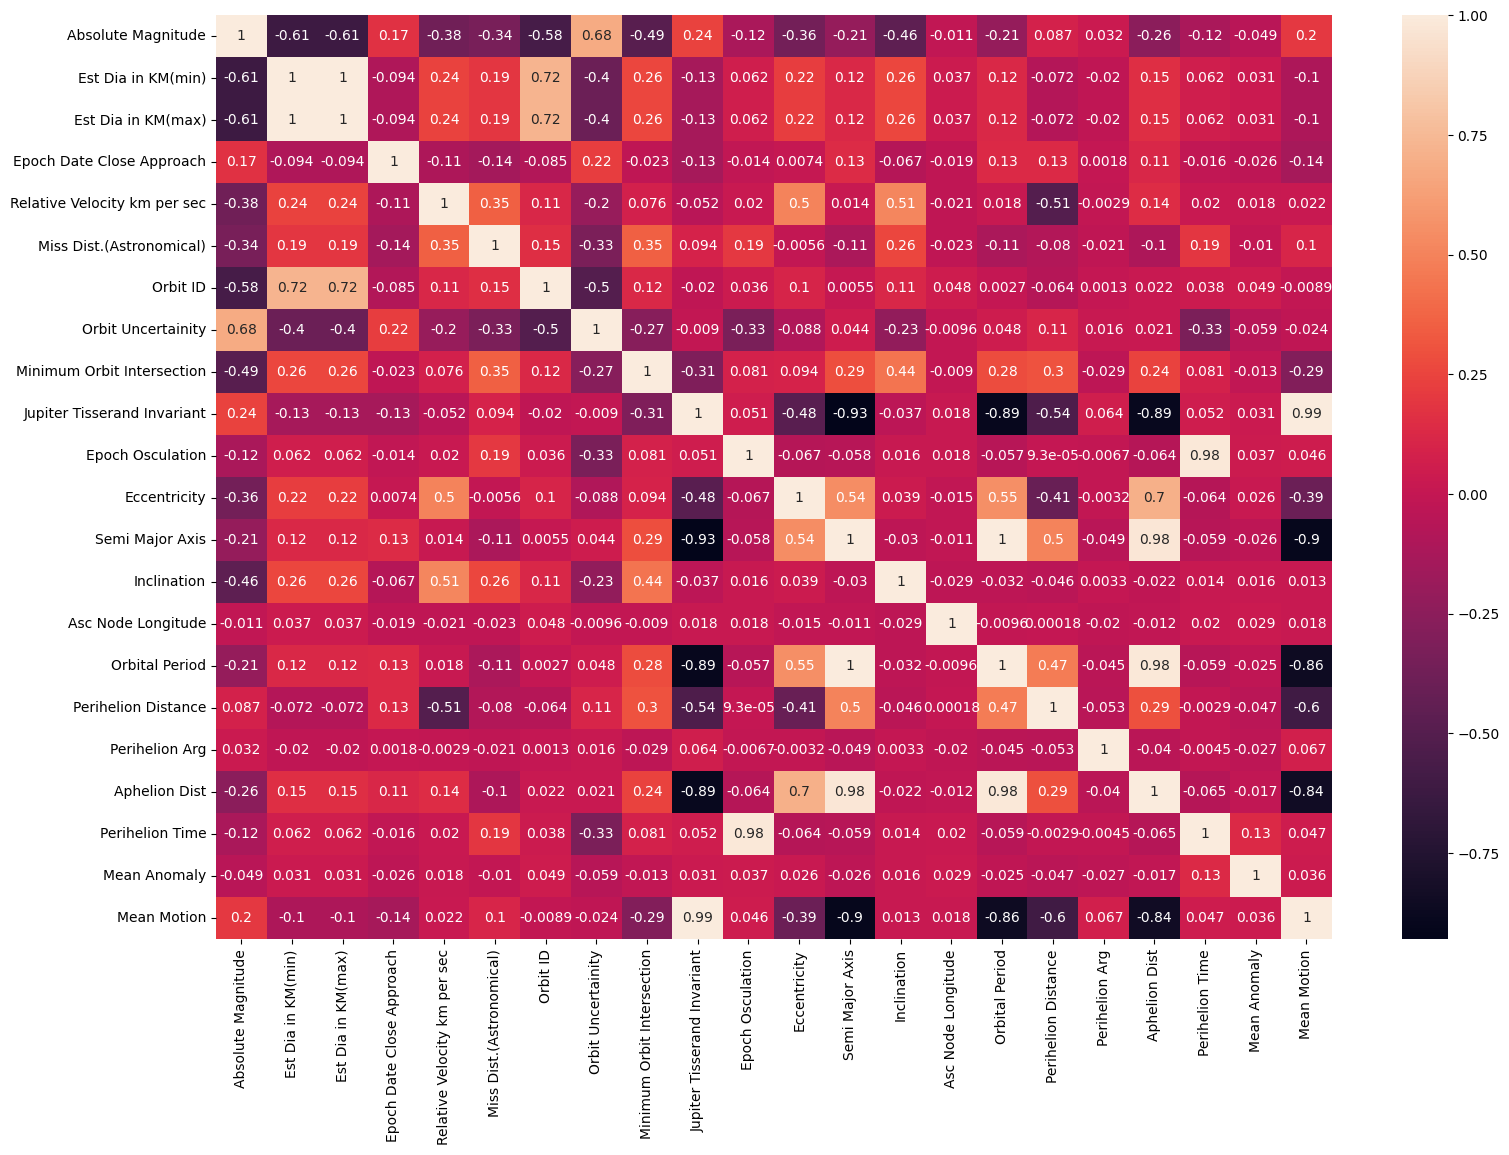

In [171]:
# relationship analysis
#corelation matrix which gives the wider perspective on the data set. a corelation matrix is a table showing corelation coefficients between variables and each cell shows that. 
# corelation matrix shows how to summarize the data as an input into a  more advance analysis and also as a diagnostic for advance analysis
plt.figure(figsize=(18,12)) #setting the figure size
sns.heatmap(df.corr(),annot=True)       #plotting the heatmap

- Here , I have used a Heatmap which represents the correlation values between the variables from my data set.
- I have used heatmap because it uses a color scale to represent correlation coefficients which makes us easy to understand the data.
- Each cell represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1.
    - The values which are close to 1 or 1indicate a strong positive correlation between the variables. 
    - For example:
        - There's a strong positive correlation  between 'Semi Major Axis' and 'Orbital Period'. This suggests that as the semi-major axis of an orbit increases, the orbital period also increases proportionally.
        - There's a moderate positive correlation (0.724) between 'Orbit ID' and 'Est Dia in KM(min)'. This suggests that certain orbits may have asteroids of relatively consistent sizes.
   - The values which are close to -1 indicate a strong negative correlation between the variables. 
   - For example:
        - There's a strong negative correlation (-0.930) between 'Jupiter Tisserand Invariant' and 'Semi Major Axis'. This suggests that as the Jupiter Tisserand Invariant decreases, the semi-major axis tends to increase.
   - The values which are close to 0 indicate no significant correlation between the variables. 
    For example:
    There's no significant correlation between 'Neo Reference ID' and other variables since most correlation coefficients are close to 0.


### Let's plot the graphs which are positively and negatively related with each other.

1. Graph of strong positive relation

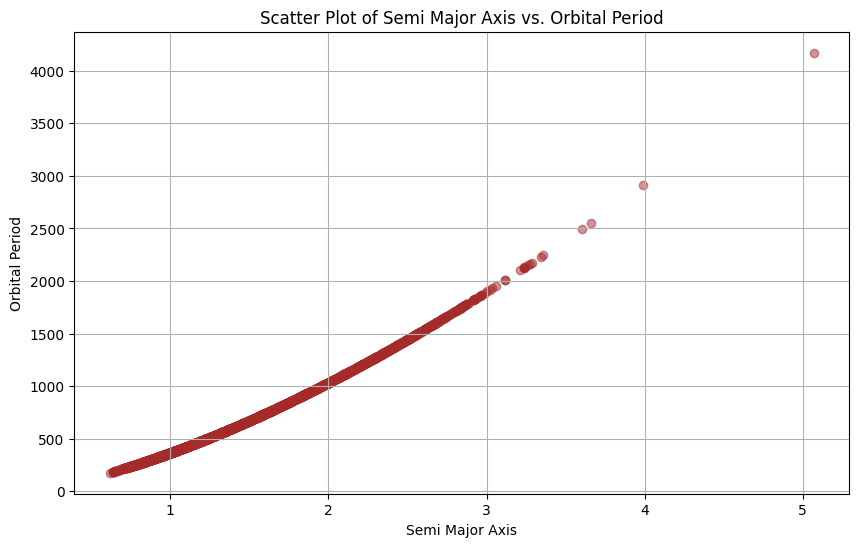

In [172]:
plt.figure(figsize=(10, 6))     #setting the figure size
plt.scatter(df['Semi Major Axis'], df['Orbital Period'], color='brown', alpha=0.5)  #plotting the scatter plot
plt.xlabel('Semi Major Axis')                   #x-axis label
plt.ylabel('Orbital Period')                    #y-axis label
plt.title('Scatter Plot of Semi Major Axis vs. Orbital Period')         #title of the plot
plt.grid(True)          #grid lines
plt.show()              #display the plot

- In the scatter plot above, each point represents an asteroid, and x-axis determines semi-major axis and y-axis determines orbital period. 
- The trend line in the above plot that slopes from the lower left to the upper right indicates a positive relationship
- It also shows how changes in one variable correspond to changes in the other variable.

2. plot of negative correlation

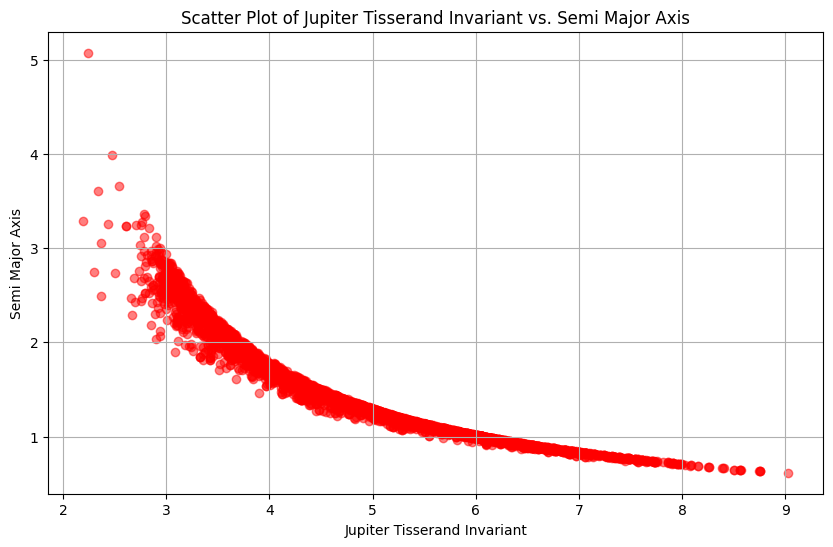

In [173]:
plt.figure(figsize=(10,6))          #setting the figure size
plt.scatter(df['Jupiter Tisserand Invariant'], df['Semi Major Axis'], color='red', alpha=0.5)       #plotting the scatter plot
plt.xlabel('Jupiter Tisserand Invariant')    #x-axis label
plt.ylabel('Semi Major Axis')                   #y-axis label
plt.title('Scatter Plot of Jupiter Tisserand Invariant vs. Semi Major Axis')        #title of the plot
plt.grid(True)          #grid lines
plt.show()        #display the plot

- In the scatter plot above, each point represents an asteroid, and x-axis determines 'Jupiter Tisserand Invariant' and y-axis determines 'Semi Major Axis'. 
- The trend line in the above plot that slopes from the upper left to the lower right indicates a negative relationship
- It also shows how changes in one variable correspond to changes in the other variable.
- It suggests that asteroids with lower Jupiter Tisserand Invariants tend to have larger semi-major axes, indicating that they may have different orbital dynamics compared to asteroids with higher Jupiter Tisserand Invariants.

- Scatter Plot

<Figure size 2000x2000 with 0 Axes>

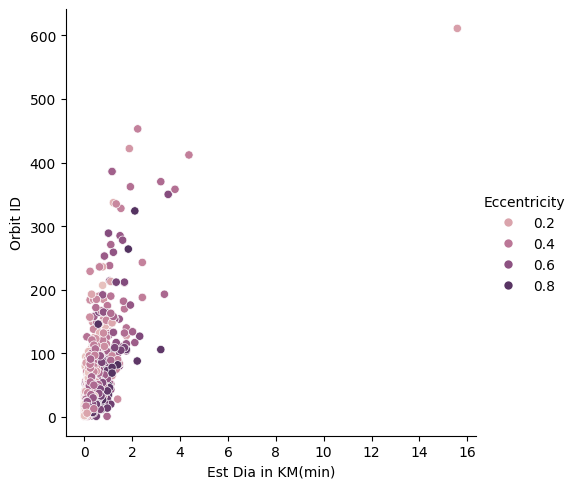

In [174]:
plt.figure(figsize=(20,20))         #setting the figure size
sns.relplot(x='Est Dia in KM(min)',y='Orbit ID',hue='Eccentricity',data=df)     #plotting the scatter plot



- The above scatter plot visualizes the relationship between the minimum diameter of asteroids ('Est Dia in KM(min)') and their orbit IDs ('Orbit ID'). Each point on the plot represents an asteroid, with its position determined by its minimum diameter on the x-axis and its orbit ID on the y-axis. Additionally, the color of each point is determined by the eccentricity of the asteroid's orbit. This allows for the exploration of how asteroid diameter relates to their orbits and eccentricities visually.

### Scaling the data

- feature standardization imporoves clustering
- Scaled data will have mean 0 and standard deviation 1 for each feature
- we have to scale because some units are in 1000 ha, some 1000 tons, some millimeter and some in centigrade

In [175]:
sc=StandardScaler()     #scaling the data
scaling_values=sc.fit_transform(df)     #fitting the data
scaling_values      #display the scaled values

array([[-0.23104209, -0.20941058, -0.20941058, ...,  0.45919023,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557, -0.15840557, ...,  0.07081791,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876,  0.07278876, ...,  0.41557933,
         1.03940428, -0.52211437],
       ...,
       [ 0.14949337, -0.34623784, -0.34623784, ...,  0.60624482,
         0.20776991, -0.63207867],
       [-0.16185382, -0.23970271, -0.23970271, ...,  0.5933032 ,
         0.2079915 , -0.56766111],
       [-1.09278193,  0.53049632,  0.53049632, ...,  0.62542342,
         0.03397983, -0.54733945]])

Observation :
- Some values are negative that indicate  the values are below the mean of the respective feature before scaling.
- Inference : If we have a feature that has been scaled using StandardScaler, and a specific value for that feature after scaling is -1, it means that the original value was below the mean value for that feature. A value of +1 would indicate it was above the mean, and 0 would indicate it was exactly at the mean.

In [176]:
df=pd.DataFrame(scaling_values,columns=list(df.columns))        #creating a data frame from the scaled values

In [177]:
#Displaying the data after scaling
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                      -0.631720                    -0.341049  ...   
1                       1.158650                     0.323902  ...   
2                      -0.434844                    -0.403261  ...   
3                      -0.850681                     0.029805  ...   
4                      -0.526325                     0.079090  ...   
...                          ...                          ...  ...   
4682                   -0.692692                     0.080706  ...   
4683                   -0.840282                     0.554170  ...   
4684                   -0.247508                    -0.522031  ...   
4685                    1.054265                    -0.467898  ...   
4686                   -0.338277                    -0.766035  ...   

      Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0            0.012875    -0.671955            1.377191       -0.070049   
1           -0.558078     1.375315           -0.343192       -0.565393   
2            0.111735    -0.835467            0.845573        0.021563   
3           -0.275446    -0.500038           -1.113477       -0.327568   
4           -0.333237     0.312713           -0.847599       -0.377402   
...               ...          ...                 ...             ...   
4682        -0.455707     2.424006           -0.077218       -0.480978   
4683        -0.620360    -0.732835            1.675947       -0.615764   
4684         0.244173    -0.820149           -1.308573        0.146859   
4685         0.164734     0.704742           -0.080902    

<div class="alert alert-block alert-success">
<b> Task 6 – Clustering
 </b> 
</div>

- Here,I am going to use K-means and DB scan clustering methods.

### K-Means

K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

To run a k-means clustering:

- Initialize the number of clusters (initialize k value)
- Also initialize the centroid for each cluster. 
- Determine which data points belong to which cluster by finding the closest centroid to each data point.
- Update the centroids based on the geometric mean of all the data points in the cluster.
- Execute 3-4 times until the centroids stop changing. Each run is referred to as an iteration.


### Elbow method graph of inertia and cluster 

Usage of Elbow Method over Kmeans

In the below plot, we are looking for an "elbow." The elbow tells us the point where increasing the number of variables does not yield a significant decrease in inertia. The inertia here is referring to within cluster sum of squares. It tells how compact a given cluster is.

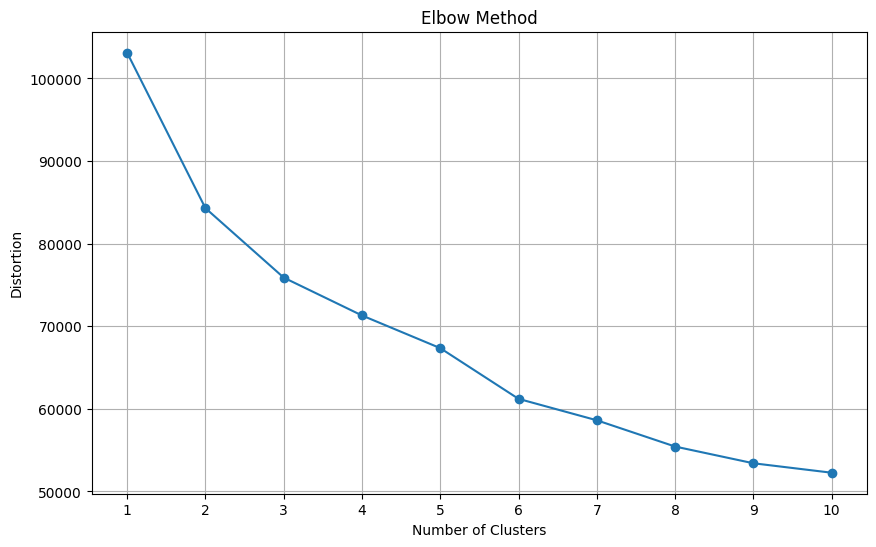

In [178]:
def elbow_method(df, max_clusters): #Elbow method is used to determine the optimal number of clusters in a dataset.
    distortions = [] #Distortion is the average of the squared distances from the cluster centers of the respective clusters.
    for i in range(1, max_clusters + 1): #The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
        kmeans.fit(df)                          #Compute k-means clustering.
        distortions.append(kmeans.inertia_)    #Sum of squared distances of samples to their closest cluster center.
    return distortions


max_clusters = 10                       #The maximum number of clusters to test for the elbow method
distortions = elbow_method(df, max_clusters) #Calling the elbow method function

plt.figure(figsize=(10, 6))         #setting the figure size
plt.plot(range(1, max_clusters + 1), distortions, marker='o') #Plotting the elbow method
plt.title('Elbow Method')           #title of the plot
plt.xlabel('Number of Clusters')        #x-axis label
plt.ylabel('Distortion')            #y-axis label
plt.xticks(range(1, max_clusters + 1))      #setting the x-axis ticks range
plt.grid(True)                          #grid lines
plt.show()                  #display the plot

In [179]:
distortions #Displaying the distortions

[103114.0,
 84296.34729645577,
 75886.81538284945,
 71301.75090501914,
 67345.30454984494,
 61204.414045340935,
 58609.13737244713,
 55430.412412942045,
 53405.2978962476,
 52261.01289975966]

- From the above Elbow Graph we can see that after number of clusters 3 the distortion or inertia is decreasing effectively. Thus 3 can act as an elbow point
- From elbow graph we can consider number of clusters to be 3. 

### For 2 Clusters

In [180]:
#KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.
kmodel=KMeans(n_clusters=2,max_iter=150,random_state=50)    
kmodel.fit(df)

KMeans(max_iter=150, n_clusters=2, random_state=50)

In [181]:
# Verify the cluster labels
kmodel.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

- Creating a new column for 2 cluster labels

In [182]:
df['2ClusterID']=kmodel.labels_ #Adding the cluster labels to the data set
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                      -0.631720                    -0.341049  ...   
1                       1.158650                     0.323902  ...   
2                      -0.434844                    -0.403261  ...   
3                      -0.850681                     0.029805  ...   
4                      -0.526325                     0.079090  ...   
...                          ...                          ...  ...   
4682                   -0.692692                     0.080706  ...   
4683                   -0.840282                     0.554170  ...   
4684                   -0.247508                    -0.522031  ...   
4685                    1.054265                    -0.467898  ...   
4686                   -0.338277                    -0.766035  ...   

      Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  \
0       -0.671955            1.377191       -0.070049            -0.021172   
1        1.375315           -0.343192       -0.565393            -0.393267   
2       -0.835467            0.845573        0.021563             0.567722   
3       -0.500038           -1.113477       -0.327568             0.704524   
4        0.312713           -0.847599       -0.377402             0.637529   
...           ...                 ...             ...                  ...   
4682     2.424006           -0.077218       -0.480978            -0.296758   
4683    -0.732835            1.675947       -0.615764             0.756305   
4684    -0.820149           -1.308573        0.146859             0.629571   
4685     0.704742 

In [183]:
df['2ClusterID'].value_counts() #Displaying the count of each cluster

2ClusterID
0    3054
1    1633
Name: count, dtype: int64

- So,there are 3054 asteroids which fall under cluster 0 and 1633 under cluster 1.

### 3 Clusters

In [184]:
kmodel=KMeans(n_clusters=3,max_iter=150,random_state=50)    #Creating a KMeans model with 3 clusters
kmodel.fit(df)              #Fitting the model to the data

KMeans(max_iter=150, n_clusters=3, random_state=50)

- Creating a column for 3 cluster labels

In [185]:
df['3ClusterID']=kmodel.labels_ #Assigning the cluster labels to the data
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                      -0.631720                    -0.341049  ...   
1                       1.158650                     0.323902  ...   
2                      -0.434844                    -0.403261  ...   
3                      -0.850681                     0.029805  ...   
4                      -0.526325                     0.079090  ...   
...                          ...                          ...  ...   
4682                   -0.692692                     0.080706  ...   
4683                   -0.840282                     0.554170  ...   
4684                   -0.247508                    -0.522031  ...   
4685                    1.054265                    -0.467898  ...   
4686                   -0.338277                    -0.766035  ...   

      Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  \
0               1.377191       -0.070049            -0.021172       -1.223886   
1              -0.343192       -0.565393            -0.393267        1.247897   
2               0.845573        0.021563             0.567722        0.623011   
3              -1.113477       -0.327568             0.704524       -1.596341   
4              -0.847599       -0.377402             0.637529       -0.248001   
...                  ...             ...                  ...             ...   
4682           -0.077218       -0.480978            -0.296758        0.893350   
4683            1.675947       -0.615764             0.756305       -1.370226   
4684           -1.308573        0.146859             0.629571        

In [186]:
df['3ClusterID'].value_counts() #Displaying the count of each cluster

3ClusterID
2    2131
1    1278
0    1278
Name: count, dtype: int64

- So,there are 1278 asteroids which fall under cluster 0,1278 under cluster 1 and 2131 under cluster2.

- Here, I have performed clustering on all features in the data set.
- But i have done the visualization based on 2 columns which are Absolute Magnitude and Minimum Orbit Intersection.

### Visualizing the 2 clusters using scattter plot

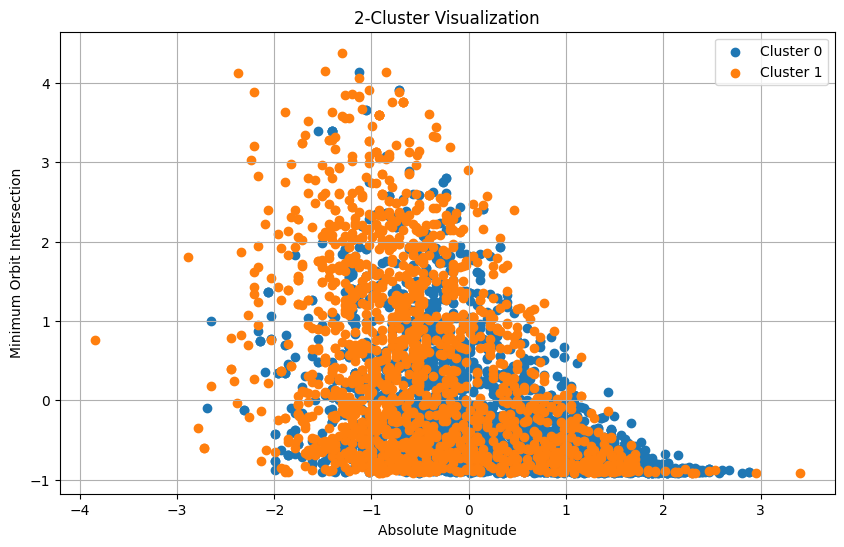

In [187]:
# Scatter plot for 2 clusters
plt.figure(figsize=(10, 6))     #setting the figure size
for cluster_id in range(2):         #looping through the clusters
    cluster_data = df[df['2ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')        #y-axis label
plt.title('2-Cluster Visualization')        #title of the plot
plt.legend()            #legend of the plot
plt.grid(True)          #grid lines
plt.show()                  #display the plot

- In the above plot 2-Clusters are observed and the plot is done between Absolute Magnitude and minimum orbit intersection.
- Cluster 0 is represented in blue color and Cluster 1 in orange color.
- The plot shows how these two features are distributed across the clusters based on their similarity.

### Visualizing the 3 clusters using scattter plot

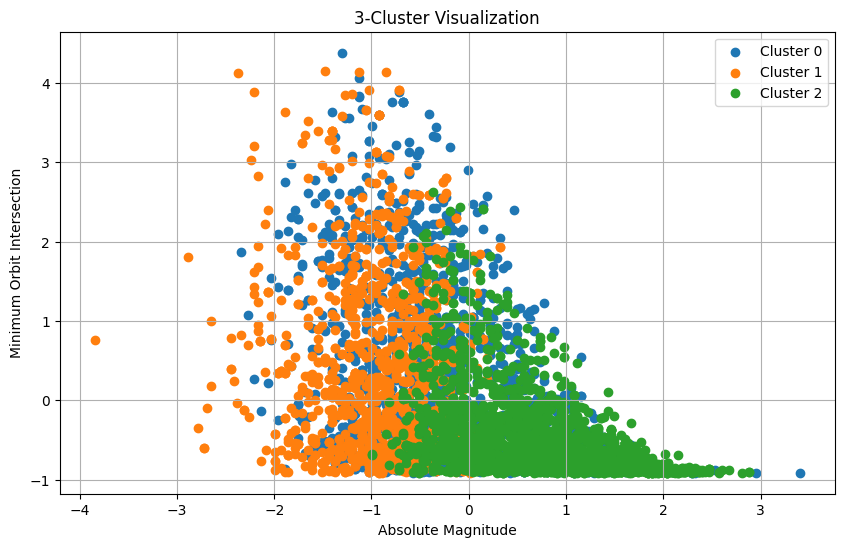

In [188]:
# Scatter plot for 3 clusters
plt.figure(figsize=(10, 6))         #setting the figure size
for cluster_id in range(3):         #looping through the clusters
    cluster_data = df[df['3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')  #plotting the scatter plot

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('3-Cluster Visualization')    #title of the plot
plt.legend()        #legend of the plot
plt.grid(True)      #grid lines
plt.show()      #display the plot

- In the above plot 3-Clusters are observed and the plot is done between Absolute Magnitude and minimum orbit intersection.
- Cluster 0 is represented in blue color, Cluster 1 in orange color and Cluster 2 in green.
- The plot shows how these two features are distributed across the 3 clusters based on their similarity.

In [189]:
#Dropping the cluster columns
dbscan_data=df.drop(columns=['2ClusterID','3ClusterID'])        #Dropping the cluster columns

In [190]:
#Displaying the data after dropping the cluster columns
dbscan_data

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                      -0.631720                    -0.341049  ...   
1                       1.158650                     0.323902  ...   
2                      -0.434844                    -0.403261  ...   
3                      -0.850681                     0.029805  ...   
4                      -0.526325                     0.079090  ...   
...                          ...                          ...  ...   
4682                   -0.692692                     0.080706  ...   
4683                   -0.840282                     0.554170  ...   
4684                   -0.247508                    -0.522031  ...   
4685                    1.054265                    -0.467898  ...   
4686                   -0.338277                    -0.766035  ...   

      Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
0            0.012875    -0.671955            1.377191       -0.070049   
1           -0.558078     1.375315           -0.343192       -0.565393   
2            0.111735    -0.835467            0.845573        0.021563   
3           -0.275446    -0.500038           -1.113477       -0.327568   
4           -0.333237     0.312713           -0.847599       -0.377402   
...               ...          ...                 ...             ...   
4682        -0.455707     2.424006           -0.077218       -0.480978   
4683        -0.620360    -0.732835            1.675947       -0.615764   
4684         0.244173    -0.820149           -1.308573        0.146859   
4685         0.164734     0.704742           -0.080902    

### DB SCAN

- DBSCAN is Density-Based Spatial Clustering of Applications with Noise. It is a clustering algorithm that effectively deals with data of arbitrary shape and data that show complex shapes and densities. In contrast to other methods, like K-means, it does not need to determine the number of clusters in advance, and it deals effectively with outliers.
    The algorithm requires two things:
    Epsilon: The distance limit.
    Min_samples: The minimum number of points required around a core point in order for a cluster to be formed.
    Cluster Formation starts with a core point, and the cluster will continue extending: add nearby core points to the cluster, and add border points that are close to them, but not extending further. This will go on until all points are clustered or added to the noise.

In [191]:
dbscan = DBSCAN(eps=2.2,min_samples=10)     #Creating a DBSCAN model
clusters=dbscan.fit_predict(dbscan_data)    #Fitting the model to the data
dbscan.labels_                              #Displaying the cluster labels

array([ 0,  0,  0, ...,  0,  0, -1])

### Visualizing the clusters using DB scan

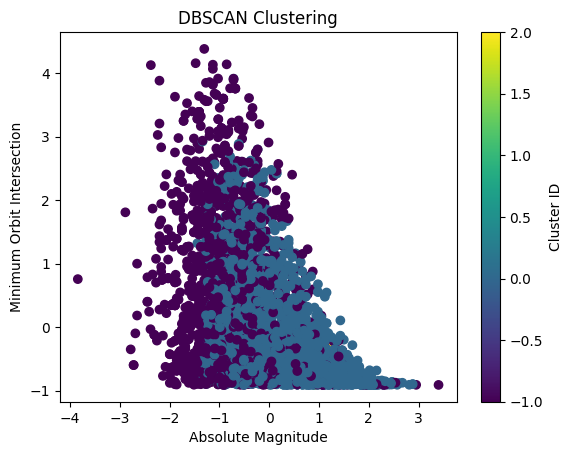

In [192]:
plt.scatter(dbscan_data['Absolute Magnitude'], dbscan_data['Minimum Orbit Intersection'], c=clusters, cmap='viridis')    #plotting the scatter plot for DBSCAN
plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('DBSCAN Clustering')          #title of the plot
plt.colorbar(label='Cluster ID')        #color bar
plt.show()                              #display the plot

- The scatter plot above uses the DB Scan clustering and the plot has two columns named Absolute Magnitude and Minimum Orbit Intersection.
- Here data points that do not belong to any cluster labeled with negative value -1.
- Cluster 0 is represented with dark blue and Cluster 1 light blue/green.
- The color bar shows that which data point is under which cluster based on the cluster Id.
- In the above plot, we can see that there are multiple dense clustering regions with some points labeled as noise data and is done on the choosen density parameters(epsilon and minimum points)

In [193]:
dbscan_data['dbscanID']=dbscan.labels_    #Assigning the cluster labels to the data
df['dbscanID']=dbscan_data['dbscanID']      #Assigning the cluster labels to the original data set
df                              #Displaying the data

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...  \
0                      -0.631720                    -0.341049  ...   
1                       1.158650                     0.323902  ...   
2                      -0.434844                    -0.403261  ...   
3                      -0.850681                     0.029805  ...   
4                      -0.526325                     0.079090  ...   
...                          ...                          ...  ...   
4682                   -0.692692                     0.080706  ...   
4683                   -0.840282                     0.554170  ...   
4684                   -0.247508                    -0.522031  ...   
4685                    1.054265                    -0.467898  ...   
4686                   -0.338277                    -0.766035  ...   

      Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  \
0          -0.070049            -0.021172       -1.223886       0.019571   
1          -0.565393            -0.393267        1.247897      -0.514802   
2           0.021563             0.567722        0.623011      -0.021323   
3          -0.327568             0.704524       -1.596341      -0.482690   
4          -0.377402             0.637529       -0.248001      -0.529316   
...              ...                  ...             ...            ...   
4682       -0.480978            -0.296758        0.893350      -0.426568   
4683       -0.615764             0.756305       -1.370226      -0.875860   
4684        0.146859             0.629571        0.876897       0.108852   
4685        0.071354             1.537

### Comparision between K-Means and DB Scan Clustering

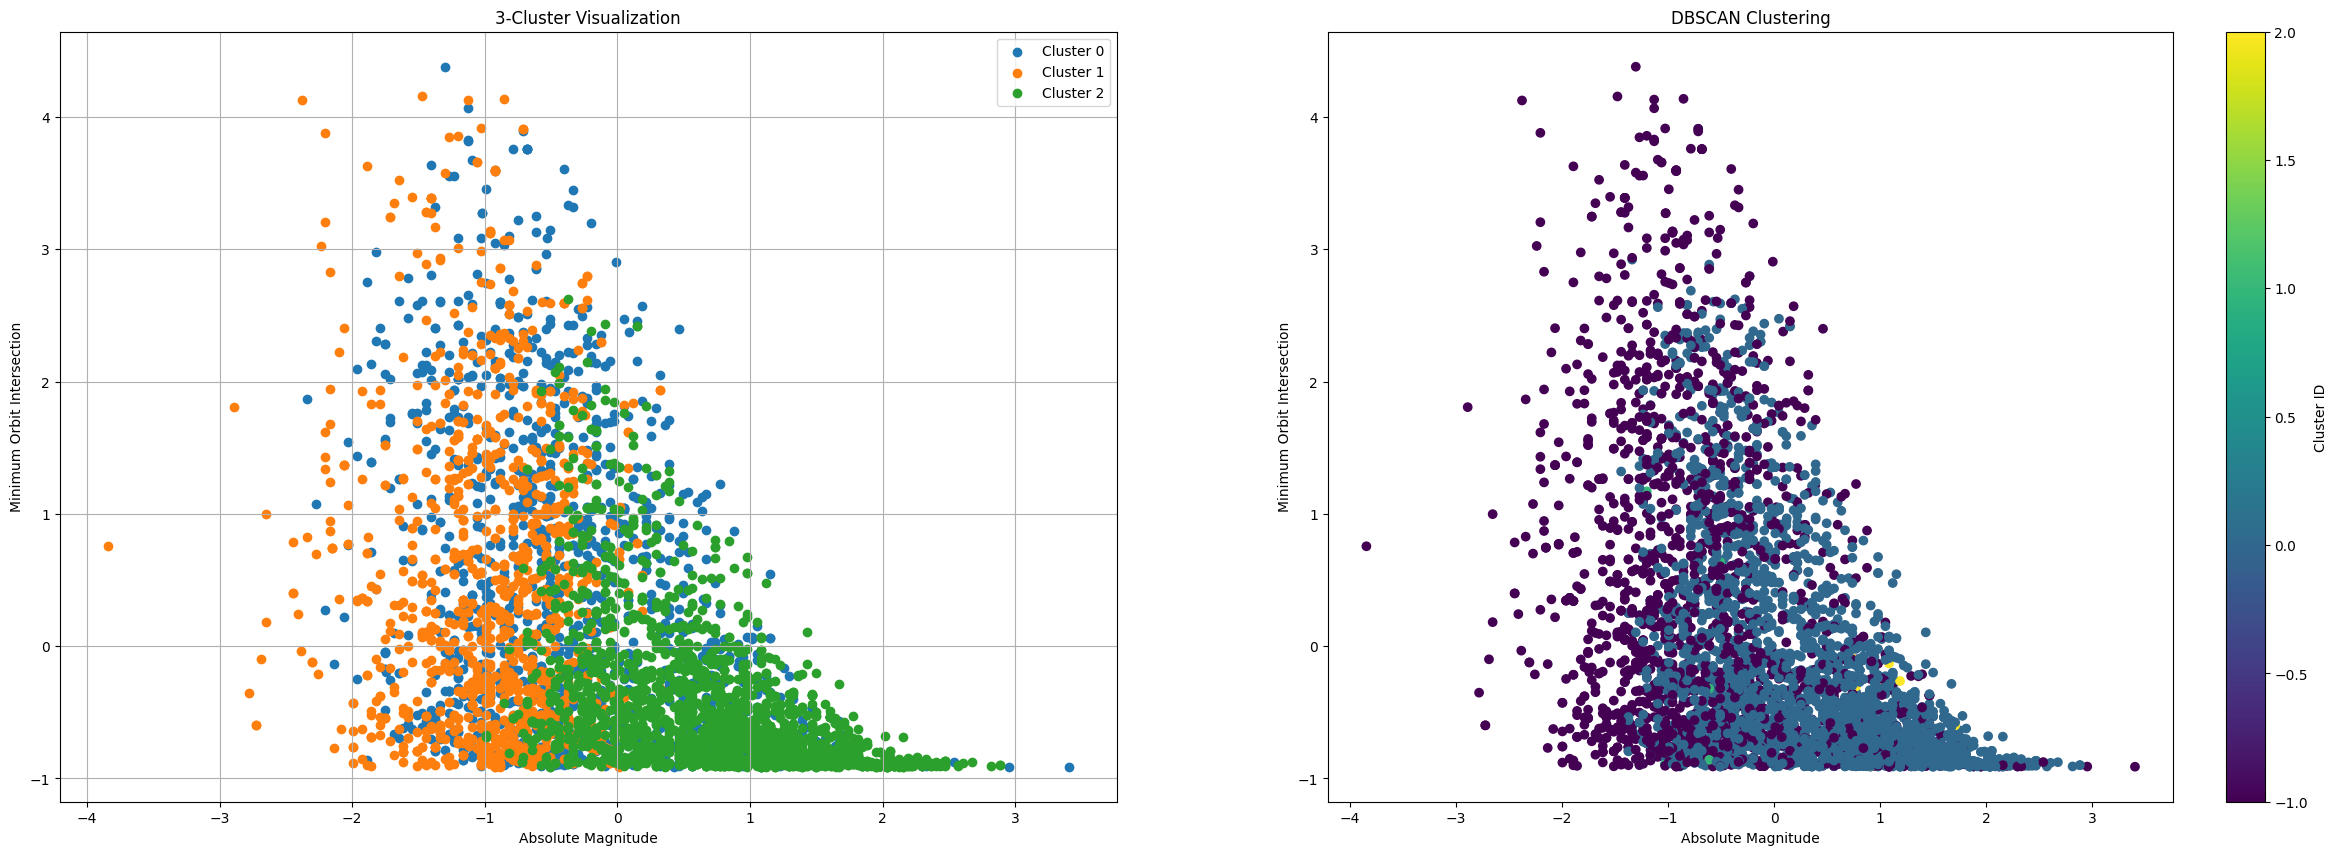

In [194]:
# Scatter plot for 3 clusters
plt.figure(figsize=(30,10))         #setting the figure size
plt.subplot(1,2,1)                  #setting the subplot
for cluster_id in range(3):                 #looping through the clusters
    cluster_data = df[df['3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')  #plotting the scatter plot for kmeans

plt.xlabel('Absolute Magnitude')    #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('3-Cluster Visualization')        #title of the plot
plt.legend()                    #legend of the plot
plt.grid(True)              #grid lines

plt.subplot(1,2,2)          #setting the subplot
plt.scatter(dbscan_data['Absolute Magnitude'], dbscan_data['Minimum Orbit Intersection'], c=clusters, cmap='viridis')   #plotting the scatter plot for DBSCAN
plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('DBSCAN Clustering')          #title of the plot
plt.colorbar(label='Cluster ID')        #color bar
plt.show()                #display the plot

- The images shows two different clustering algorithms: K-means and DBSCAN.

***K-means Clustering (Left Plot)***
The left plot demonstrates a K-means clustering where data points are grouped into three clusters (Cluster 0 in blue, Cluster 1 in orange, and Cluster 2 in green). K-means clustering technique partitions the data into k distinct clusters based on distance to the centroid of a cluster. The goal is to minimize the sum of distances between the points and their respective cluster centroid

***DBSCAN Clustering (Right Plot)***
The right plot shows the result of DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

In comparision we can see the outliers more clearly in the k-means clustering plot and even the count of clustering ponts which i got through k means was the same as the original data set.
Moreover the k-means clustering plot is making us to understand the data of asteroids with similar absolute magnitude and minimum orbit intersection.
So,I will be using K-means clustering plot in the experiment.




<div class="alert alert-block alert-success">
<b> Task 7– Dimensionality Reduction
 </b> 
</div>

***Interpret PCA***

- Since the principal components are linear combinations of the attributes, we are basically trying to identify which variables affect the principal components the most. More specifically, we look at the covariance matrix to see which attribute has the most covariance with the principal component.

In [195]:
pca_data=df.drop(columns=['2ClusterID','3ClusterID','dbscanID']) #Dropping the cluster columns
pca = PCA(n_components=12)                      #Applying PCA   
principal_components = pca.fit_transform(pca_data)    #Fit the model with X and apply the dimensionality reduction on X.
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                                'PC12']) #Creating a dataframe with the principal components

principal_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.034446 -0.214744 -0.754585 -0.161347  0.499526 -2.426167 -1.493726   
1    -0.724300  1.560630 -0.045817 -0.743639 -1.827495  0.314956 -1.426469   
2     0.350485 -0.028416 -0.939659  0.682510  1.276577 -1.216752 -1.858446   
3    -1.407102 -1.521256 -0.749435  0.174603 -0.378586 -0.439460 -1.561669   
4    -0.776308  0.599138 -0.960619  0.448614 -0.947376 -0.179023 -1.918945   
...        ...       ...       ...       ...       ...       ...       ...   
4682 -1.005100 -0.719792  0.929583 -1.050463 -0.607622  0.477363  2.625902   
4683 -2.503816 -2.506549 -1.436114  1.383551  1.171669 -1.618601  1.887301   
4684  0.320510 -1.901774 -0.895391  0.302727  0.895311  1.544473  1.011795   
4685  0.532808 -0.819992 -1.656682  0.649356 -1.419945  0.306515  1.558831   
4686  1.450304  1.882384  0.500814 -1.910158 -2.297130  0.708282  2.549256   

           PC8       PC9      PC10      PC11      PC12  
0    -0.029344  0.250825 -0.285607  1.106841  0.107501  
1     0.547892 -1.007380  0.744578  0.418517  0.415032  
2     0.628055 -1.362234  0.874642 -0.852456 -0.072540  
3    -2.078434  0.889883  1.087470  1.385324 -0.449210  
4    -1.099200 -0.277468  0.273780  0.311750 -0.873376  
...        ...       ...       ...       ...       ...  
4682  1.081058 -1.071015  1.990342 -0.254741 -0.721784  
4683  0.580784  0.725737  0.576436 -0.201359 -0.049045  
4684 -0.373851 -0.901443  0.139573 -0.464647  0.275124  
4685  0.327758 -0.066709  0.118878 -0.099025 -0.012292  
4686  1.055003  0.386591  1.333522  0.978424 -2.088949  

[4687 rows x 12 columns]

- So,here i have taken 12 number of components

In [196]:
df = pd.concat([df, principal_df], axis=1)  #Concatenating the principal components with the original data set
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...       PC3  \
0                      -0.631720                    -0.341049  ... -0.754585   
1                       1.158650                     0.323902  ... -0.045817   
2                      -0.434844                    -0.403261  ... -0.939659   
3                      -0.850681                     0.029805  ... -0.749435   
4                      -0.526325                     0.079090  ... -0.960619   
...                          ...                          ...  ...       ...   
4682                   -0.692692                     0.080706  ...  0.929583   
4683                   -0.840282                     0.554170  ... -1.436114   
4684                   -0.247508                    -0.522031  ... -0.895391   
4685                    1.054265                    -0.467898  ... -1.656682   
4686                   -0.338277                    -0.766035  ...  0.500814   

           PC4       PC5       PC6       PC7       PC8       PC9      PC10  \
0    -0.161347  0.499526 -2.426167 -1.493726 -0.029344  0.250825 -0.285607   
1    -0.743639 -1.827495  0.314956 -1.426469  0.547892 -1.007380  0.744578   
2     0.682510  1.276577 -1.216752 -1.858446  0.628055 -1.362234  0.874642   
3     0.174603 -0.378586 -0.439460 -1.561669 -2.078434  0.889883  1.087470   
4     0.448614 -0.947376 -0.179023 -1.918945 -1.099200 -0.277468  0.273780   
...        ...       ...       ...       ...       ...       ...       ...   
4682 -1.050463 -0.607622  0.477363  2.625902  1.081058 -1.071015  1.990342   
4683  1.383551  1.171669 -1.618601  1.887301  0.580784

- Here,I am going to use the K-means clustering algorithm from the task-6

In [197]:
pca_model=KMeans(n_clusters=2,max_iter=150,random_state=50) #Applying KMeans algorithm
pca_model.fit(principal_df)             #Fitting the model to the data

KMeans(max_iter=150, n_clusters=2, random_state=50)

In [198]:
df['PCA_2ClusterID']=pca_model.labels_  #Assigning the cluster labels to the data
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...       PC4  \
0                      -0.631720                    -0.341049  ... -0.161347   
1                       1.158650                     0.323902  ... -0.743639   
2                      -0.434844                    -0.403261  ...  0.682510   
3                      -0.850681                     0.029805  ...  0.174603   
4                      -0.526325                     0.079090  ...  0.448614   
...                          ...                          ...  ...       ...   
4682                   -0.692692                     0.080706  ... -1.050463   
4683                   -0.840282                     0.554170  ...  1.383551   
4684                   -0.247508                    -0.522031  ...  0.302727   
4685                    1.054265                    -0.467898  ...  0.649356   
4686                   -0.338277                    -0.766035  ... -1.910158   

           PC5       PC6       PC7       PC8       PC9      PC10      PC11  \
0     0.499526 -2.426167 -1.493726 -0.029344  0.250825 -0.285607  1.106841   
1    -1.827495  0.314956 -1.426469  0.547892 -1.007380  0.744578  0.418517   
2     1.276577 -1.216752 -1.858446  0.628055 -1.362234  0.874642 -0.852456   
3    -0.378586 -0.439460 -1.561669 -2.078434  0.889883  1.087470  1.385324   
4    -0.947376 -0.179023 -1.918945 -1.099200 -0.277468  0.273780  0.311750   
...        ...       ...       ...       ...       ...       ...       ...   
4682 -0.607622  0.477363  2.625902  1.081058 -1.071015  1.990342 -0.254741   
4683  1.171669 -1.618601  1.887301  0.580784  0.725737

In [199]:
pca_model=KMeans(n_clusters=3,max_iter=150,random_state=50)  #Applying KMeans algorithm
pca_model.fit(principal_df)                     #Compute k-means clustering.
df['PCA_3ClusterID']=pca_model.labels_              #Assigning the cluster labels to the data
df

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0              -0.231042           -0.209411           -0.209411   
1              -0.334824           -0.158406           -0.158406   
2              -0.680766            0.072789            0.072789   
3               1.775418           -0.529864           -0.529864   
4              -0.231042           -0.209411           -0.209411   
...                  ...                 ...                 ...   
4682            0.564623           -0.434310           -0.434310   
4683            2.052171           -0.537204           -0.537204   
4684            0.149493           -0.346238           -0.346238   
4685           -0.161854           -0.239703           -0.239703   
4686           -1.092782            0.530496            0.530496   

      Epoch Date Close Approach  Relative Velocity km per sec  \
0                     -1.973087                     -1.077139   
1                     -1.973087                      0.568146   
2                     -1.970035                     -0.874892   
3                     -1.966982                     -0.383539   
4                     -1.966982                     -0.566337   
...                         ...                           ...   
4682                   1.481014                      1.122183   
4683                   1.481014                     -1.473533   
4684                   1.481014                     -0.929615   
4685                   1.481014                     -0.359101   
4686                   1.481014                      3.013536   

      Miss Dist.(Astronomical)  Orbit ID  Orbit Uncertainity  \
0                     1.116075 -0.295089            0.481822   
1                     0.865921 -0.190639           -0.167955   
2                    -1.411843 -0.164526           -1.142621   
3                     0.195800 -0.556216            0.806711   
4                     1.036159 -0.086188           -0.817732   
...                        ...       ...                 ...   
4682                 -1.477660 -0.634554            1.456488   
4683                 -1.717003 -0.686779            0.806711   
4684                 -1.342886 -0.295089            0.806711   
4685                  0.027311 -0.582329            0.481822   
4686                  1.410276 -0.399540            0.806711   

      Minimum Orbit Intersection  Jupiter Tisserand Invariant  ...       PC5  \
0                      -0.631720                    -0.341049  ...  0.499526   
1                       1.158650                     0.323902  ... -1.827495   
2                      -0.434844                    -0.403261  ...  1.276577   
3                      -0.850681                     0.029805  ... -0.378586   
4                      -0.526325                     0.079090  ... -0.947376   
...                          ...                          ...  ...       ...   
4682                   -0.692692                     0.080706  ... -0.607622   
4683                   -0.840282                     0.554170  ...  1.171669   
4684                   -0.247508                    -0.522031  ...  0.895311   
4685                    1.054265                    -0.467898  ... -1.419945   
4686                   -0.338277                    -0.766035  ... -2.297130   

           PC6       PC7       PC8       PC9      PC10      PC11      PC12  \
0    -2.426167 -1.493726 -0.029344  0.250825 -0.285607  1.106841  0.107501   
1     0.314956 -1.426469  0.547892 -1.007380  0.744578  0.418517  0.415032   
2    -1.216752 -1.858446  0.628055 -1.362234  0.874642 -0.852456 -0.072540   
3    -0.439460 -1.561669 -2.078434  0.889883  1.087470  1.385324 -0.449210   
4    -0.179023 -1.918945 -1.099200 -0.277468  0.273780  0.311750 -0.873376   
...        ...       ...       ...       ...       ...       ...       ...   
4682  0.477363  2.625902  1.081058 -1.071015  1.990342 -0.254741 -0.721784   
4683 -1.618601  1.887301  0.580784  0.725737  0.576436

In [200]:
df['PCA_2ClusterID'].value_counts(),df['PCA_3ClusterID'].value_counts() #Displaying the count of each cluster

(PCA_2ClusterID
 0    3067
 1    1620
 Name: count, dtype: int64,
 PCA_3ClusterID
 0    3059
 1    1627
 2       1
 Name: count, dtype: int64)

### 2 Clusters visualization after PCA

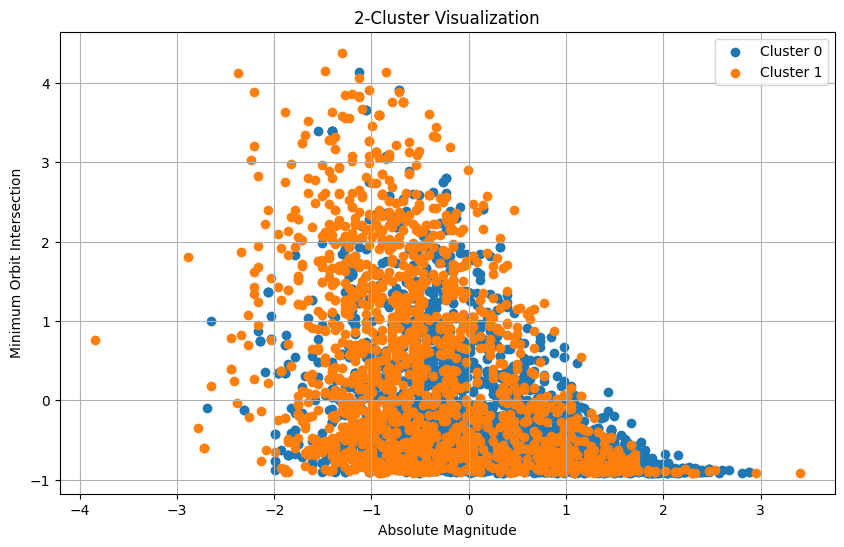

In [201]:
# Scatter plot for 2 clusters
plt.figure(figsize=(10, 6))         #setting the figure size
for cluster_id in range(2):             #looping through the clusters
    cluster_data = df[df['PCA_2ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')        #y-axis label
plt.title('2-Cluster Visualization')            #title of the plot
plt.legend()                #legend of the plot of the clusters
plt.grid(True)          #grid lines
plt.show()        #display the plot

- From the 2 cluster visualization from task 6 there were 3054 data points in cluster 0 and 1633 points in cluster1
- After pca, there are 3067 data points in cluster 0,1620 data points in cluster 1.

### 3 Cluster visualization after pca

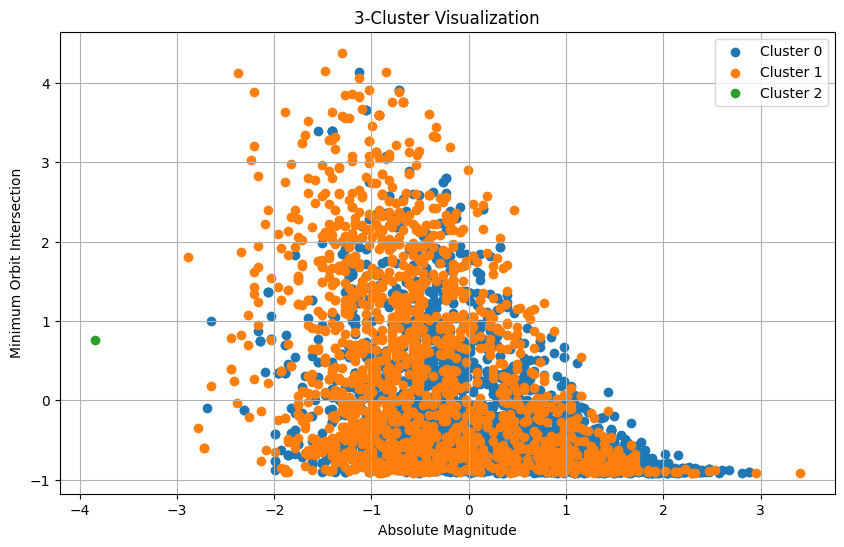

In [202]:
# Scatter plot for 3 clusters
plt.figure(figsize=(10, 6))         #setting the figure size
for cluster_id in range(3):             #looping through the clusters
    cluster_data = df[df['PCA_3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')

plt.xlabel('Absolute Magnitude')            #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('3-Cluster Visualization')        #title of the plot
plt.legend()                                #legend of the plot
plt.grid(True)                    #grid lines   
plt.show()                  #display the plot

- From the 3 cluster visualization from task 6 there were 1278 data points in cluster 0, 1278 in Cluster 1 and 2131 points in cluster2
- After pca, there are 3059 data points in cluster 0,1627 data points in cluster 1 and 1 data point in Cluster 2
- As we can see there is a huge difference in cluster 2 and in cluster 1.The data points which were in the cluster 2 were moved to cluster 1.

### Let's compare the 3 Cluster visualization using K-means before and after Dimensionality Reduction.

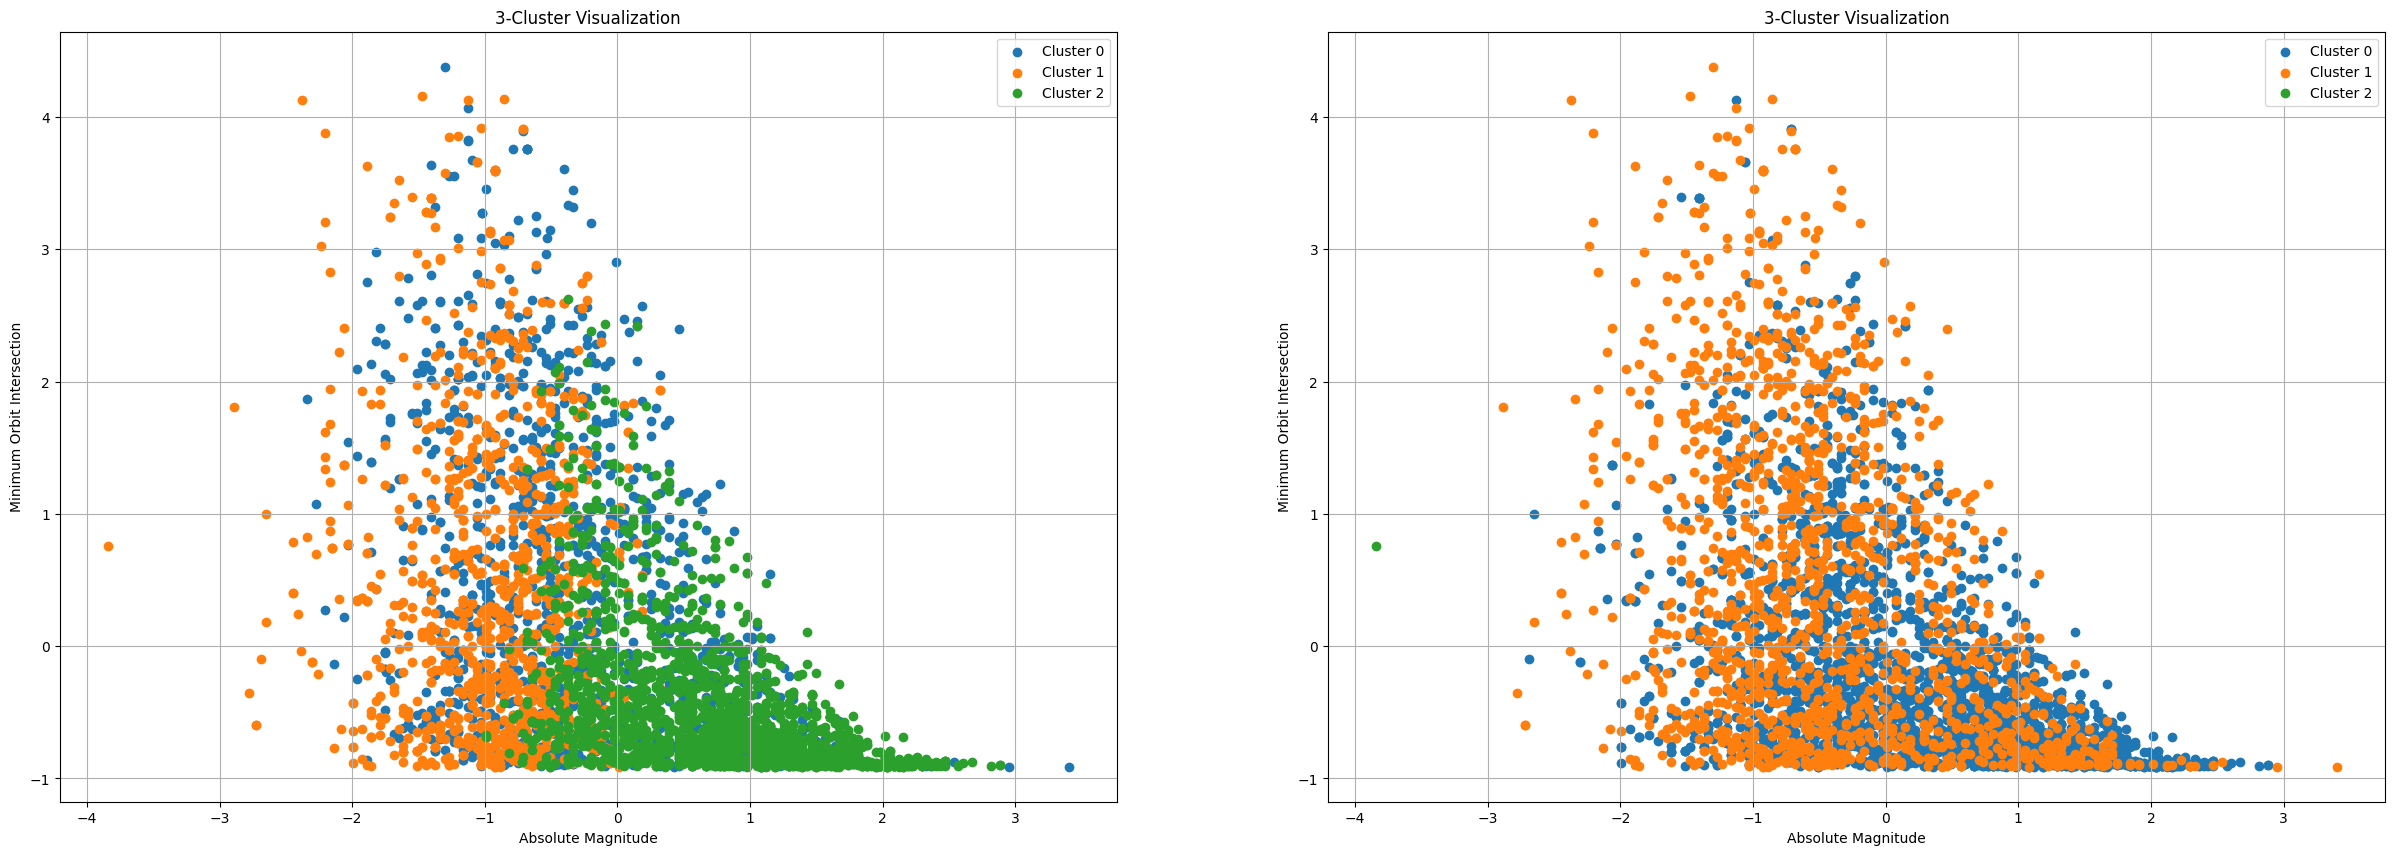

In [203]:
plt.figure(figsize=(30,10))     #setting the figure size
plt.subplot(1,2,1)              #setting the subplot
for cluster_id in range(3):         #looping through the clusters
    cluster_data = df[df['3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')  #plotting the scatter plot for kmeans

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')        #y-axis label
plt.title('3-Cluster Visualization')            #title of the plot
plt.legend()                                #legend of the plot
plt.grid(True)                  #grid lines

plt.subplot(1,2,2)              #setting the subplot
for cluster_id in range(3):         #looping through the clusters
    cluster_data = df[df['PCA_3ClusterID'] == cluster_id]
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')      #plotting the scatter plot for PCA

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')        #y-axis label
plt.title('3-Cluster Visualization')            #title of the plot
plt.legend()                        #legend of the plot
plt.grid(True)                  #grid lines
plt.show()              #display the plot

-  These two plots shows the result of applying Principal Component Analysis before K-means clustering. 
    For the first plot, the PCA is not used, and the clusters will have a lot of overlap, suggesting that the high dimensionality of the input data may mixed with actual groupings. 
    In the second plot, where PCA is applied, the clusters are very clearly marked and defined, meaning that PCA helps in reducing the noise and enhancing the fundamental characteristics of the data. Generally, PCA boosts the performance of K-means clustering since it simplifies the structure of data and orients the analysis toward the variance carrying information, allowing the most defined clusters.

In [204]:
df['3ClusterID'].value_counts(),df['PCA_3ClusterID'].value_counts() #Displaying the count of each cluster

(3ClusterID
 2    2131
 1    1278
 0    1278
 Name: count, dtype: int64,
 PCA_3ClusterID
 0    3059
 1    1627
 2       1
 Name: count, dtype: int64)

- As we can see from the above,the data points after dimensionality reduction using pca are having differnet values in every cluster.
- The very low count in Cluster 2 might indicate an outlier or a very unique data point in the context of PCA.
- In summary, this output is showing how many items fall into each cluster both before and after applying PCA to the dataset. This kind of analysis helps in understanding the structure of the data and identifying patterns or groups within it.

In [205]:
df.columns      #column names

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', '2ClusterID', '3ClusterID', 'dbscanID', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'PCA_2ClusterID', 'PCA_3ClusterID'],
      dtype='object')

<div class="alert alert-block alert-success">
<b> Task 8– Cluster Interpretation
 </b> 
</div>

***Here, I am going to do the analysis based on Task 6.***
- I am going to use this 3-Cluster Visualization for the explanation.

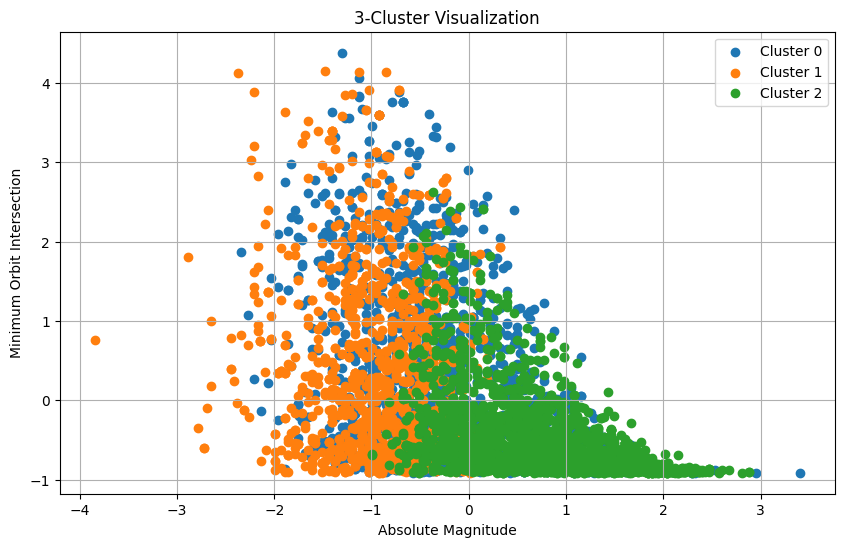

In [206]:
plt.figure(figsize=(10, 6))     #setting the figure size
for cluster_id in range(3):     #looping through the clusters
    cluster_data = df[df['3ClusterID'] == cluster_id]           #filtering the data based on the cluster
    plt.scatter(cluster_data['Absolute Magnitude'], cluster_data['Minimum Orbit Intersection'], label=f'Cluster {cluster_id}')  #plotting the scatter plot

plt.xlabel('Absolute Magnitude')        #x-axis label
plt.ylabel('Minimum Orbit Intersection')    #y-axis label
plt.title('3-Cluster Visualization')        #title of the plot
plt.legend()                            #legend of the plot        
plt.grid(True)                          #grid lines
plt.show()                  #display the plot


### Advantages of k-means
- kmeans significantly faster on large datasets. In this time taken for calculation is 0.1s
- K-means tends to work well with clusters of approximately similar size and density

***Interpretation***
- we can see the outliers more clearly in the k-means clustering plot and even the count of clustering ponts which i got through k means was the same as the original data set
- I have performed the K-means clustering on the whole data set. But for the visualization i have taken two columns: Absolute Magnitude and Minimum orbit intersection.
- Clusters in Absolute Magnitude: It may be that brighter objects (i.e., objects with lower absolute magnitude) seem to cluster together, while those that are dimmer (objects with a higher absolute magnitude) tend to form another cluster. Also,analyzing whether there is a trend that suggests that brighter objects have minimum orbit intersections that are closer or farther away. 
- Clusters in Minimum Orbit Intersection: Objects with minimum orbit intersections that are smaller or bigger which are close to the earth's orbit. Also, check if those are also generally brighter or dimmer.

***Cluster Analysis***

- Bright, Close Objects: This may be directing towards objects with low absolute magnitude and minimum orbit intersection, which could be bright but at a small distance from Earth's orbit, and further observation is required.

- Dim, Far Objects: Under this cluster, there is a high possibility of objects having high absolute magnitude and minimum orbit intersection values, which will give the implication of being dimmer and less threatening celestial objects in crossing of orbit.

- Application in Practical Life:
     The mentioned clusters will classify the celestial objects with respect to the danger and observation priority. Bright objects with close orbits that have intersections of priority are due to their visibility and their proximity to the orbit of the Earth. Such clustering analysis would offer a simple, visual, and analytic way to better guide the prioritization of observations and resource management in space exploration and monitoring efforts.


<div class="alert alert-block alert-success">
<b> Task 9– Conclusions and Future Work
 </b> 
</div>

### Conclusion
This clustering approach will not only augment our understanding of the features of celestial objects but also assist in prioritization for further observation and allocation of resources in space exploration and monitoring. This classification, therefore, will provide a more detailed way for astronomers and space agencies to focus their allocation of resources on objects which could be of more immediate and therefore higher concern. Therefore, the K-means clustering approach remains highly valuable in its application to the field of astronomy and will offer a manner of analysis that is direct, structured, and efficient in attaining optimal decisions in space science and safety.
### Future Work
- Implement DTW: With a few features such as those being temporal in nature, for example, 'Epoch Date Close Approach' and 'Orbital Period', the DTW implementation will be able to find trends in the feature of the object orbits.

- Experiment with Hierarchical Clustering: This may give insight into the presence of the relationship, if at all, that allows the organization to develop a multi-tier monitoring system.

- Advanced Anomaly Detection Techniques: Since the detection of anomalies, in the form of objects that might be threatening but have not been considered earlier, is of importance, the usage of machine learning models specialized in anomaly detection allows fine-tuning in the identification of potentially hazardous objects. 

- Historical Data Analysis: Analyze historical data on past close approaches and impacts to refine the risk assessment model. Understanding the outcomes of past events can improve predictions and preparedness for future encounters.

- Simulate Potential Collision Scenarios: Simulate in the trajectory of high-risk clusters using simulation software to be able to give better predictions and provide better planning for future potential collisions. 

- All of these specific methods shall not only refine the findings at present but also build the capacity for the organization to handle and mitigate potential threats from near-Earth objects.

<div class="alert alert-block alert-success">
<b> END
 </b> 
</div>